Import Required Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Load the Dataset

In [ ]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/Data set/titanic (1).csv")


df.head()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table


df = pd.read_csv("/content/drive/MyDrive/Data set/titanic (1).csv")
head_df = df.head()


fig, ax = plt.subplots(figsize=(12, 2))
ax.axis('off')


tbl = table(ax, head_df, loc='center', cellLoc='center', colWidths=[0.15]*len(head_df.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)

plt.savefig("head_output.png", dpi=300, bbox_inches='tight')
plt.show()


from google.colab import files
files.download("head_output.png")

In [ ]:
pip install colorama

In [ ]:
import pandas as pd
from colorama import Fore, Style

# Step 1: Read the dataset
df = pd.read_csv("/content/drive/MyDrive/Data set/titanic (1).csv")

# Step 2: Display dataset information
print(Fore.CYAN + "\nDataset Information:" + Style.RESET_ALL)
num_rows, num_cols = df.shape
print(Fore.GREEN + f"Number of Rows: {num_rows}" + Style.RESET_ALL)
print(Fore.MAGENTA + f"Number of Columns: {num_cols}" + Style.RESET_ALL)


Dataset Information:
Number of Rows: 891
Number of Columns: 12


In [ ]:
# Check for missing values# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
# Check for missing values# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [ ]:
# Label encoding for multiple columns using apply
cols_to_encode = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
for col in cols_to_encode:
    df[col] = pd.factorize(df[col])[0]

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,0,0,38.0,1,0,0,71.2833,0,0
3,4,1,1,1,0,35.0,1,0,1,53.1000,1,1
6,7,0,1,2,1,54.0,0,0,2,51.8625,2,1
10,11,1,3,3,0,4.0,1,1,3,16.7000,3,1
11,12,1,1,4,0,58.0,0,0,4,26.5500,4,1
21,22,1,2,5,1,34.0,0,0,5,13.0000,5,1
23,24,1,1,6,1,28.0,0,0,6,35.5000,6,1
27,28,0,1,7,1,19.0,3,2,7,263.0000,7,1
52,53,1,1,8,0,49.0,1,0,8,76.7292,8,0
54,55,0,1,9,1,65.0,0,1,9,61.9792,9,0


Model-based Feature Importance (Random Forest)

In [ ]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,0,0,38.0,1,0,0,71.2833,0,0
3,4,1,1,1,0,35.0,1,0,1,53.1000,1,1
6,7,0,1,2,1,54.0,0,0,2,51.8625,2,1
10,11,1,3,3,0,4.0,1,1,3,16.7000,3,1
11,12,1,1,4,0,58.0,0,0,4,26.5500,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,178,0,47.0,1,1,36,52.5542,35,1
872,873,0,1,179,1,33.0,0,0,124,5.0000,103,1
879,880,1,1,180,0,56.0,0,1,50,83.1583,130,0
887,888,1,1,181,0,19.0,0,0,125,30.0000,131,1


In [ ]:
# Split the dataset into features (X) and Survived (y)
X = df.drop(columns='Survived')  # Replace 'Survived' with your actual Survived column name
y = df['Survived']

# Train Random Forest Classifier for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract feature importance scores
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True, inplace=True)

# Display the ranked features
print("Feature Ranking:\n", feature_importance)

Feature Ranking:
 Pclass         0.013606
Parch          0.016305
Embarked       0.017620
SibSp          0.018047
Cabin          0.100488
PassengerId    0.107272
Name           0.110485
Ticket         0.114741
Age            0.141946
Fare           0.145543
Sex            0.213948
dtype: float64


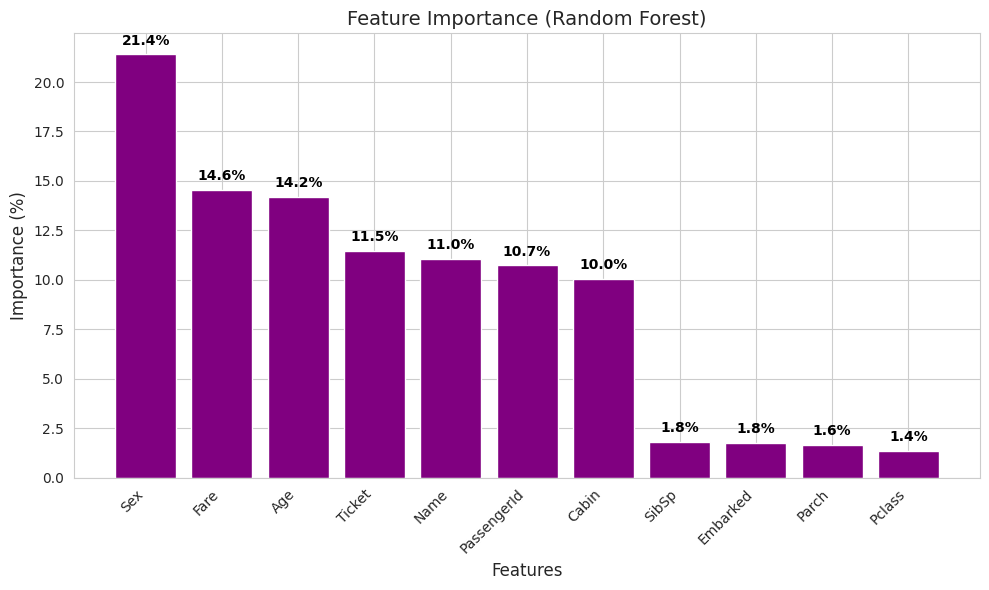

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from google.colab import files

# 1. Prepare the data
X = df.drop(columns='Survived')
y = df['Survived']

# 2. Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# 3. Extract and normalize feature importance as percentages
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
percentage_importance = 100 * feature_importance / feature_importance.sum()

# 4. Plot with percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_importance.index, percentage_importance.values, color='purple')
plt.title('Feature Importance (Random Forest)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 5. Add percentage labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%',
             ha='center', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.savefig('Feature_Importance_Percentage_RF.png', dpi=300, bbox_inches='tight')
plt.show()

files.download("Feature_Importance_Percentage_RF.png")


Lasso - L1 Regularization

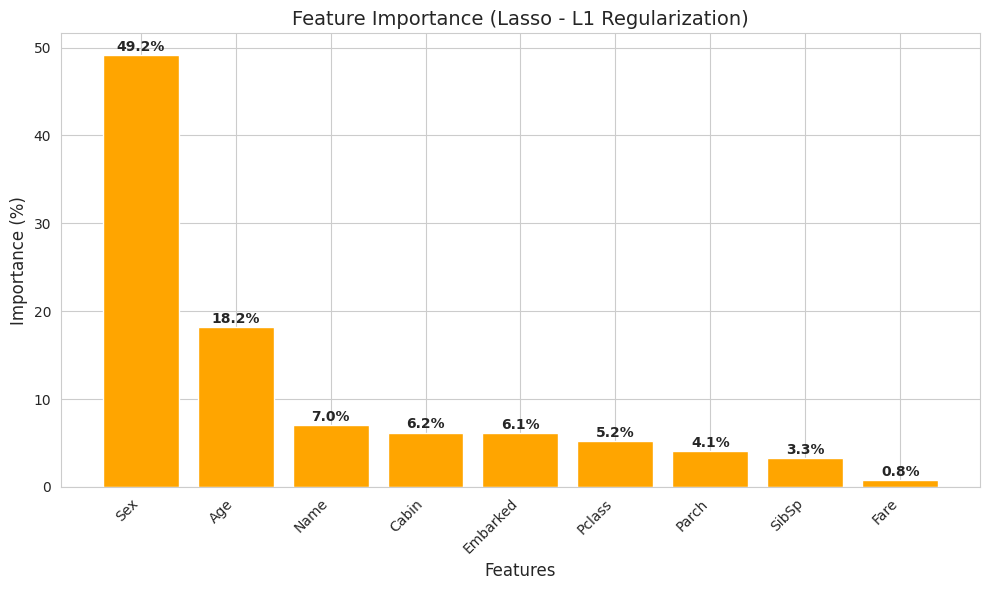

Feature Ranking (Lasso - L1) with Percentages:
 Sex         49.155307
Age         18.208844
Name         7.017228
Cabin        6.173821
Embarked     6.102250
Pclass       5.184945
Parch        4.078566
SibSp        3.283009
Fare         0.796029
dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# 1. Prepare Features and Target
X = df.drop(columns='Survived')  # Change 'Survived' if your target column has a different name
y = df['Survived']

# 2. Standardize features for Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply Lasso Regression
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y)

# 4. Compute absolute coefficients and filter non-zero
lasso_importance = pd.Series(np.abs(lasso.coef_), index=X.columns)
lasso_importance = lasso_importance[lasso_importance > 0]  # Remove zero coefficients
lasso_importance.sort_values(ascending=False, inplace=True)

# 5. Convert to percentages
percentage_importance = 100 * lasso_importance / lasso_importance.sum()

# 6. Plot with percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_importance.index, percentage_importance.values, color='orange')
plt.title('Feature Importance (Lasso - L1 Regularization)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 7. Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%',
             ha='center', fontsize=10, fontweight='bold')

# 8. Save and show
plt.tight_layout()
plt.savefig('Feature_Importance_Lasso_Percentage.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. Print ranked features with percentages
print("Feature Ranking (Lasso - L1) with Percentages:\n", percentage_importance)

# 10. Download the plot
files.download("Feature_Importance_Lasso_Percentage.png")


Mutual Information

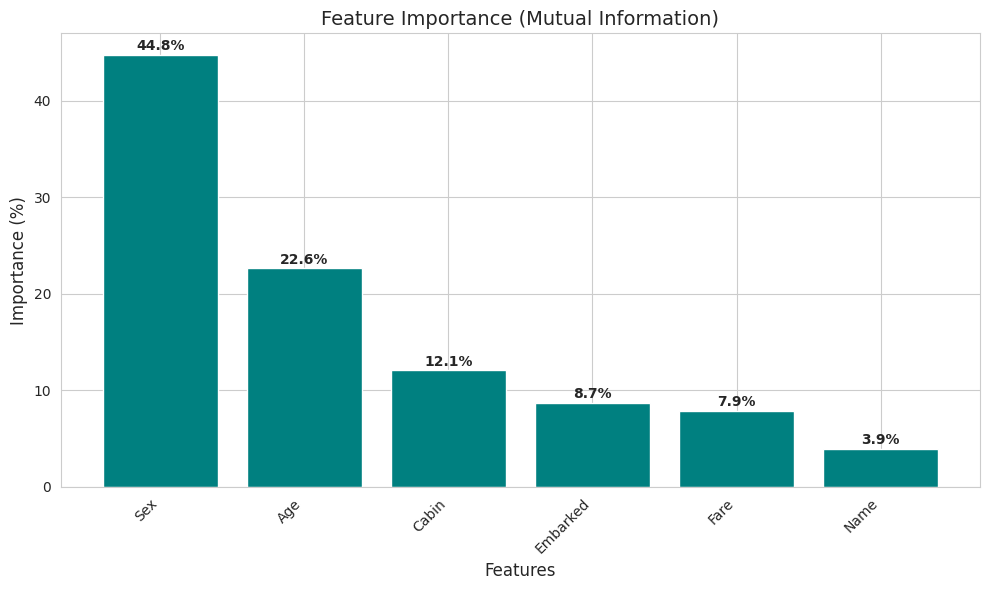

Feature Importance (% based on Mutual Information):
 Sex         44.770670
Age         22.642598
Cabin       12.075385
Embarked     8.686961
Fare         7.917453
Name         3.906932
dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# 1. Prepare features and target
X = df.drop(columns='Survived')
y = df['Survived']

# 2. Drop missing values if any
X = X.dropna()
y = y.loc[X.index]

# 3. Calculate MI scores
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns)

# 4. Filter zero scores (optional)
mi_series = mi_series[mi_series > 0]
mi_series.sort_values(ascending=False, inplace=True)

# 5. Convert to percentage
mi_percent = 100 * mi_series / mi_series.sum()

# 6. Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(mi_percent.index, mi_percent.values, color='teal')
plt.title('Feature Importance (Mutual Information)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# 7. Add % labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()

# 8. Save and show plot
plt.savefig('Feature_Importance_MI_BarChart.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. Print values
print("Feature Importance (% based on Mutual Information):\n", mi_percent)

# 10. Download image (Colab)
files.download('Feature_Importance_MI_BarChart.png')


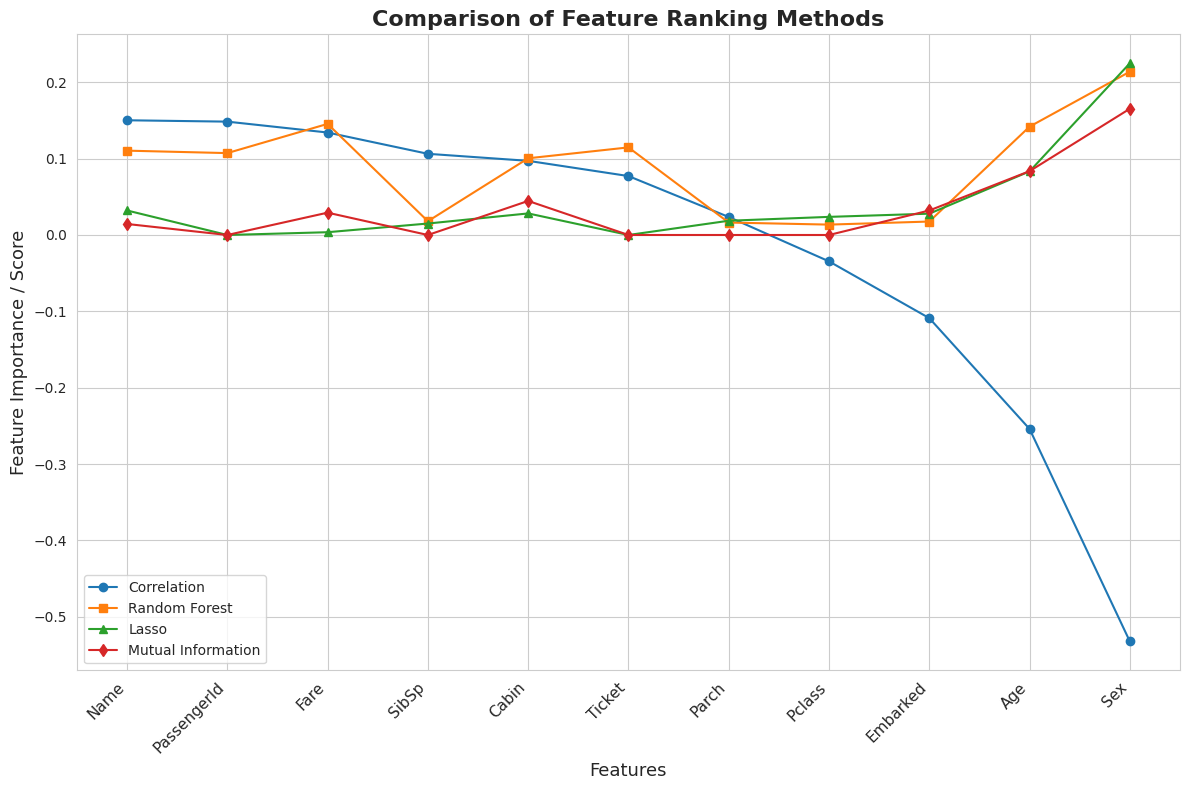

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Feature Ranking Scores Comparison:

             Correlation  Random Forest     Lasso  Mutual Information
Age            -0.254085       0.141946  0.083341            0.083645
Cabin           0.097137       0.100488  0.028257            0.044608
Embarked       -0.108914       0.017620  0.027930            0.032091
Fare            0.134241       0.145543  0.003643            0.029248
Name            0.150280       0.110485  0.032117            0.014433
Parch           0.023582       0.016305  0.018667            0.000000
PassengerId     0.148495       0.107272  0.000000            0.000000
Pclass         -0.034542       0.013606  0.023731            0.000000
Sex            -0.532418       0.213948  0.224981            0.165389
SibSp           0.106346       0.018047  0.015026            0.000000
Ticket          0.077201       0.114741  0.000000            0.000000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

# ====== Data preparation ======
X = df.drop(columns='Survived')
y = df['Survived']

# 1) Correlation with target
correlation = df.corr()['Survived'].drop('Survived').sort_values(ascending=False)

# 2) Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# 3) Lasso Feature Importance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y)
lasso_importance = pd.Series(np.abs(lasso.coef_), index=X.columns).sort_values(ascending=False)

# 4) Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_importance = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# ==== Combine all into a DataFrame for comparison ====
comparison_df = pd.DataFrame({
    'Correlation': correlation,
    'Random Forest': rf_importance,
    'Lasso': lasso_importance,
    'Mutual Information': mi_importance
}).fillna(0)

# Sort features by Correlation score for plotting order
features_ordered = comparison_df['Correlation'].sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Plot each method's scores with different colors & markers
plt.plot(comparison_df.loc[features_ordered, 'Correlation'], label='Correlation', marker='o')
plt.plot(comparison_df.loc[features_ordered, 'Random Forest'], label='Random Forest', marker='s')
plt.plot(comparison_df.loc[features_ordered, 'Lasso'], label='Lasso', marker='^')
plt.plot(comparison_df.loc[features_ordered, 'Mutual Information'], label='Mutual Information', marker='d')

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylabel('Feature Importance / Score', fontsize=13)
plt.xlabel('Features', fontsize=13)
plt.title('Comparison of Feature Ranking Methods', fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()

# Save figure
plt.savefig('Feature_Ranking_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Download in Google Colab environment
try:
    from google.colab import files
    files.download('Feature_Ranking_Comparison.png')
except:
    print("Not running in Google Colab or download failed.")

# Print combined table for reference
print("\nFeature Ranking Scores Comparison:\n")
print(comparison_df)


Rank the Features and Assign to Subsets    Next

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming df is your Titanic DataFrame and 'Survived' is the target

# 1. Prepare data
X = df.drop(columns='Survived')
y = df['Survived']

# For simplicity, encode categorical variables using one-hot encoding (modify as needed)
X_encoded = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 2. Random Forest feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
rf_selected_features = rf_importance[rf_importance > rf_importance.mean()].index.tolist()

# 3. Lasso feature importance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled, y_train)
lasso_coef = pd.Series(np.abs(lasso.coef_), index=X_train.columns)
lasso_selected_features = lasso_coef[lasso_coef > 0].index.tolist()

# 4. Mutual Information feature importance
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_series = pd.Series(mi_scores, index=X_train.columns)
mi_selected_features = mi_series[mi_series > mi_series.mean()].index.tolist()

# 5. Define a function to train and evaluate a Random Forest on selected features
def evaluate_features(feature_list, method_name):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train[feature_list], y_train)
    preds = model.predict(X_test[feature_list])
    acc = accuracy_score(y_test, preds)
    print(f"{method_name} selected features: {len(feature_list)}")
    print(f"{method_name} model accuracy: {acc:.4f}")
    return acc

# 6. Evaluate each method
acc_rf = evaluate_features(rf_selected_features, "Random Forest")
acc_lasso = evaluate_features(lasso_selected_features, "Lasso")
acc_mi = evaluate_features(mi_selected_features, "Mutual Information")

# 7. Select the best method
acc_results = {
    "Random Forest": acc_rf,
    "Lasso": acc_lasso,
    "Mutual Information": acc_mi
}

best_method = max(acc_results, key=acc_results.get)
print(f"\nBest feature selection method: {best_method} with accuracy {acc_results[best_method]:.4f}")


Random Forest selected features: 7
Random Forest model accuracy: 0.7568
Lasso selected features: 9
Lasso model accuracy: 0.7568
Mutual Information selected features: 3
Mutual Information model accuracy: 0.7568

Best feature selection method: Random Forest with accuracy 0.7568


In [ ]:
# Assuming rf is your trained Random Forest model and X_train.columns are feature names

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top7 = importances.sort_values(ascending=False).head(7)

print("Top 7 Features and their Importance Scores:\n")
print(top7)


Top 7 Features and their Importance Scores:

Sex            0.208631
Age            0.154727
Fare           0.142458
Ticket         0.116660
Name           0.113540
Cabin          0.097827
PassengerId    0.095986
dtype: float64



🔝 Top 7 Most Important Features:

Sex            0.208631
Age            0.154727
Fare           0.142458
Ticket         0.116660
Name           0.113540
Cabin          0.097827
PassengerId    0.095986
dtype: float64

⚠️ All Less Important Features (everything except top 7):

SibSp       0.022236
Embarked    0.020143
Parch       0.017681
Pclass      0.010111
dtype: float64


/tmp/ipython-input-1622775795.py:38: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


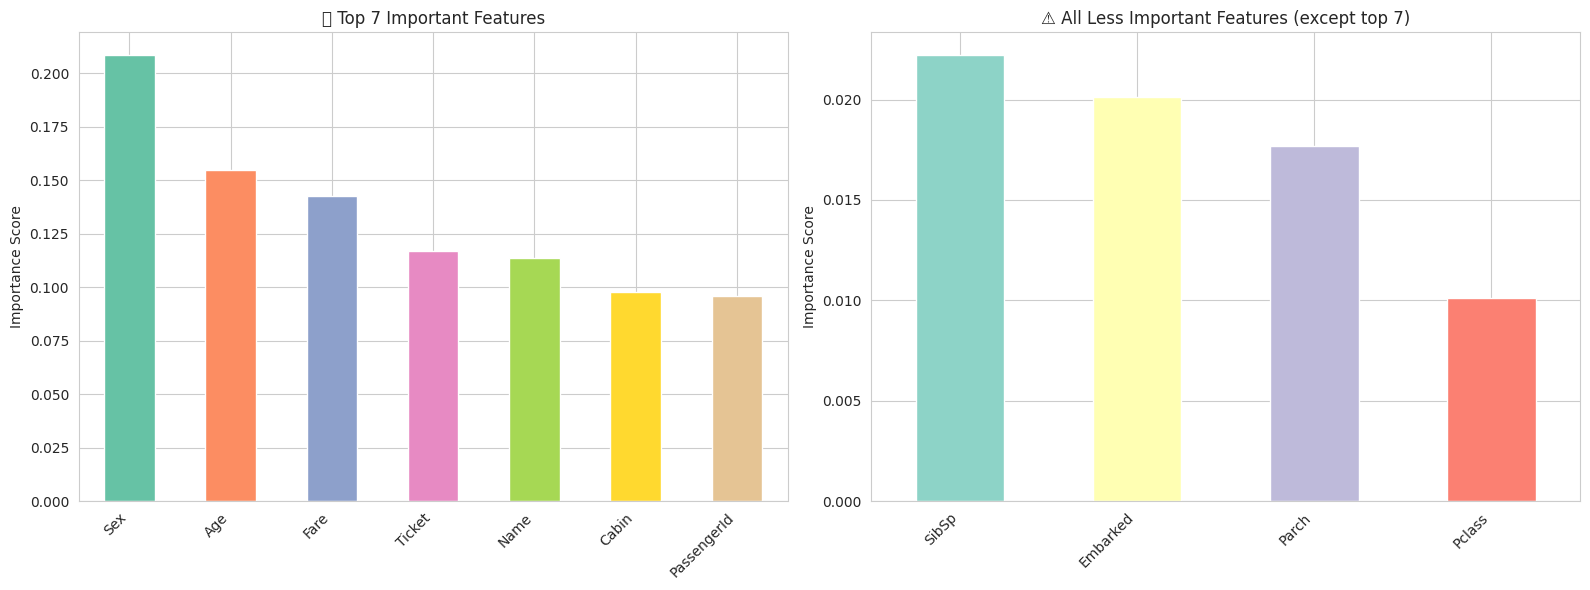

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort importances descending
sorted_importances = importances.sort_values(ascending=False)

# Top 7 most important
top7 = sorted_importances.head(7)
print("\n🔝 Top 7 Most Important Features:\n")
print(top7)

# All other features except top 7 (less important group)
less_important = sorted_importances.iloc[7:]
print("\n⚠️ All Less Important Features (everything except top 7):\n")
print(less_important)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Plot top 7 with colorful bars
plt.subplot(1, 2, 1)
top_colors = sns.color_palette("Set2", len(top7))
top7.plot(kind='bar', color=top_colors)
plt.title('🎯 Top 7 Important Features')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance Score')

# Plot all less important features
plt.subplot(1, 2, 2)
bottom_colors = sns.color_palette("Set3", len(less_important))
less_important.plot(kind='bar', color=bottom_colors)
plt.title('⚠️ All Less Important Features (except top 7)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Importance Score')

plt.tight_layout()
plt.show()


In [ ]:
print(df.columns.tolist())


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
df = df.drop(['SibSp','Embarked','Parch','Pclass'], axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin
1,2,1,0,0,38.0,0,71.2833,0
3,4,1,1,0,35.0,1,53.1000,1
6,7,0,2,1,54.0,2,51.8625,2
10,11,1,3,0,4.0,3,16.7000,3
11,12,1,4,0,58.0,4,26.5500,4


In [ ]:
#df['Cabin'].unique()

In [ ]:
# Install required packages (run once)
!pip install catboost xgboost lightgbm --quiet

Logistic Regression Accuracy: 0.78
Random Forest Accuracy: 0.76
Naive Bayes Accuracy: 0.76
AdaBoost Accuracy: 0.76


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:48:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.73
CatBoost Accuracy: 0.78
[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

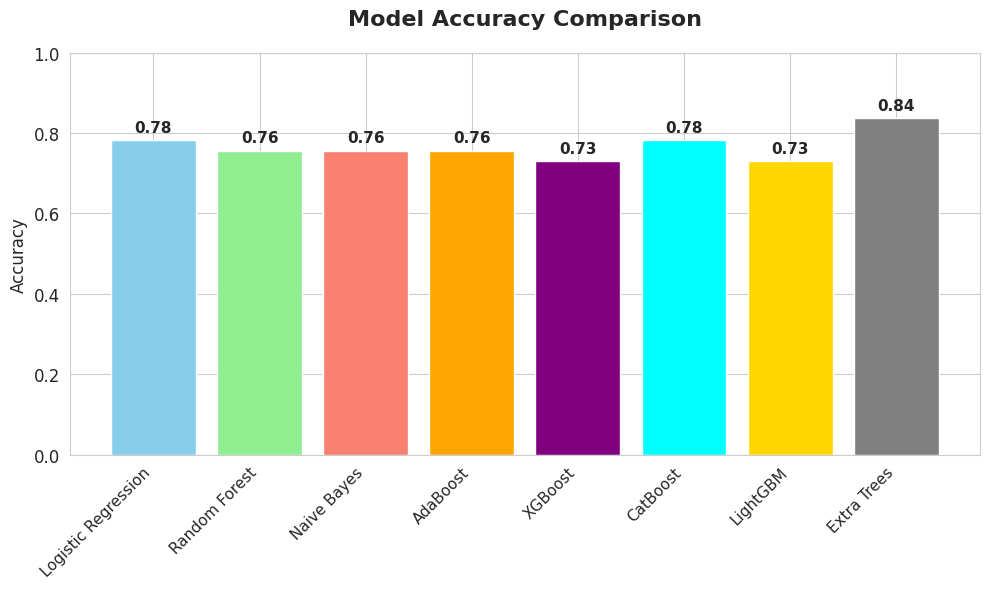

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Additional model imports
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


# Prepare features (X) and target (y)
X = df.drop(columns='Survived')
y = df['Survived']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Store accuracy results
accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
model_names = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.bar(model_names, accuracy_values, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 'cyan', 'gold', 'grey'])
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=12)

# Annotate bars
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()

plt.savefig('model_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download("model_accuracy_comparison.png")



Error calculation

Logistic Regression Accuracy: 0.78, Error: 0.22
Random Forest Accuracy: 0.76, Error: 0.24
Naive Bayes Accuracy: 0.76, Error: 0.24
AdaBoost Accuracy: 0.76, Error: 0.24
XGBoost Accuracy: 0.73, Error: 0.27


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:48:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost Accuracy: 0.78, Error: 0.22
[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

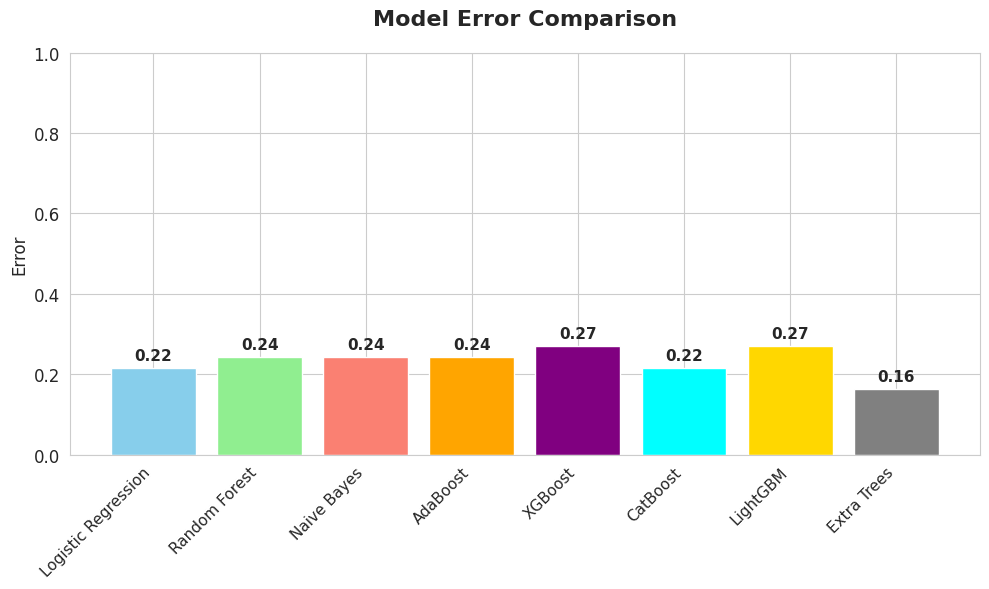

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Additional model imports
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Step 1: Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment and replace with your file if needed

# Step 2: Prepare features (X) and target (y)
X = df.drop(columns='Survived')
y = df['Survived']


# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Step 5: Train, Predict, and Calculate Accuracy & Error
accuracies = {}
errors = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    err = 1 - acc
    accuracies[name] = acc
    errors[name] = err
    print(f"{name} Accuracy: {acc:.2f}, Error: {err:.2f}")

# Step 6: Visualization of Errors
plt.figure(figsize=(10, 6))
model_names = list(errors.keys())
error_values = list(errors.values())

plt.bar(model_names, error_values, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 'cyan', 'gold', 'grey'])
plt.title('Model Error Comparison', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Error', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=12)

# Annotate each bar with error value
for i, v in enumerate(error_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()

plt.savefig('Model Error Comparison.png', dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download('Model Error Comparison.png')


In [ ]:
import seaborn as sns

import pandas as pd


target_correlation = df.drop('Survived', axis=1).corrwith(df['Survived']).sort_values(ascending=False)

Calculate Feature Correlation with the Target Variable

/tmp/ipython-input-2726381521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_correlation.index, y=target_correlation.values, palette='viridis')


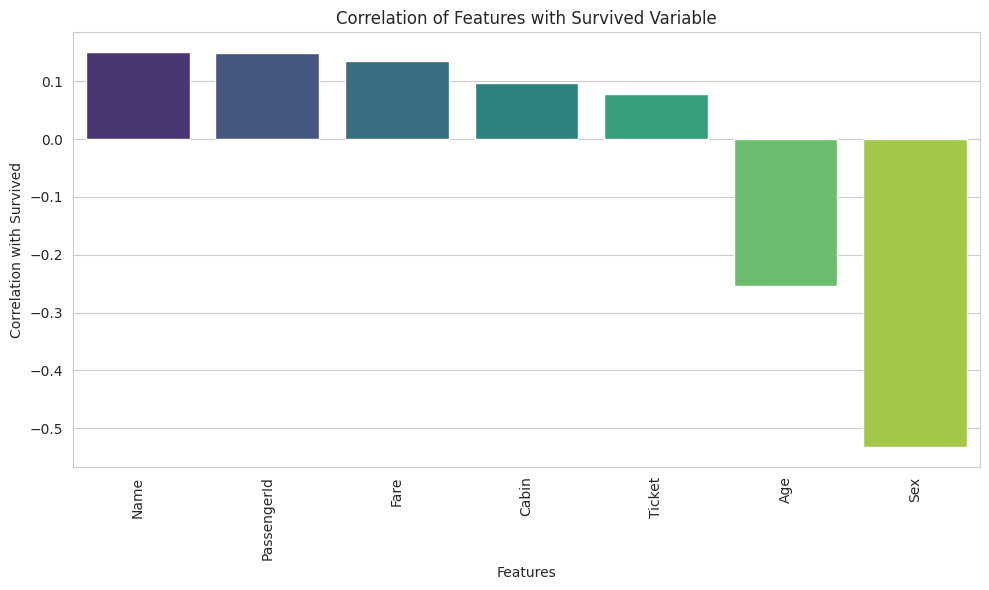

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlation.index, y=target_correlation.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Correlation of Features with Survived Variable')
plt.xlabel('Features')
plt.ylabel('Correlation with Survived')

plt.tight_layout()
plt.savefig('Correlation_of_Features_with_Survived_Variable.png', dpi=300, bbox_inches='tight')
plt.show()


from google.colab import files
files.download('Correlation_of_Features_with_Survived_Variable.png')

In [ ]:
df.head()

,PassengerId,Survived,Name,Sex,Age,Ticket,Fare,Cabin
1,2,1,0,0,38.0,0,71.2833,0
3,4,1,1,0,35.0,1,53.1000,1
6,7,0,2,1,54.0,2,51.8625,2
10,11,1,3,0,4.0,3,16.7000,3
11,12,1,4,0,58.0,4,26.5500,4


Rank the Features and Assign to Subsets

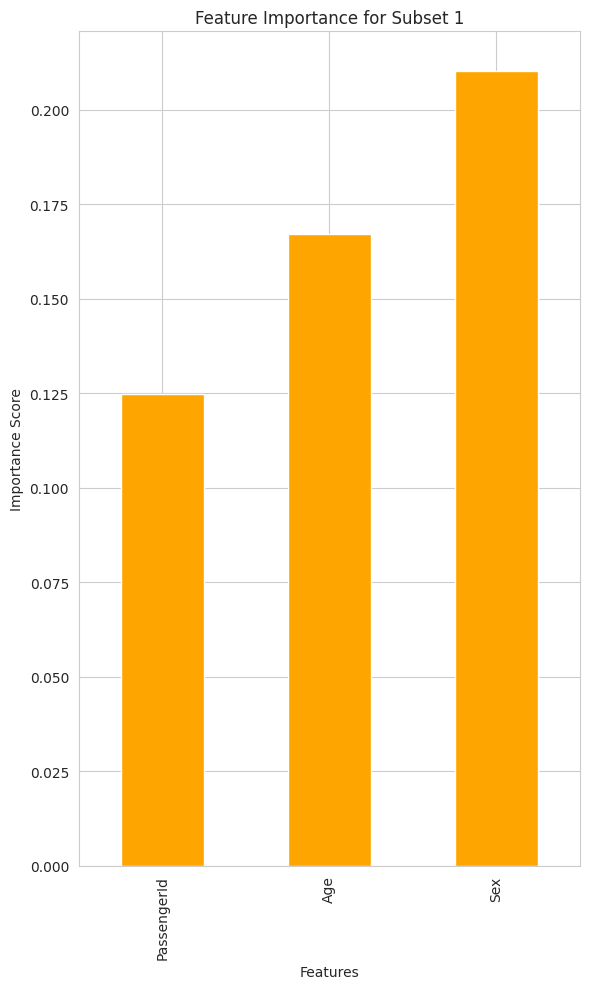

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

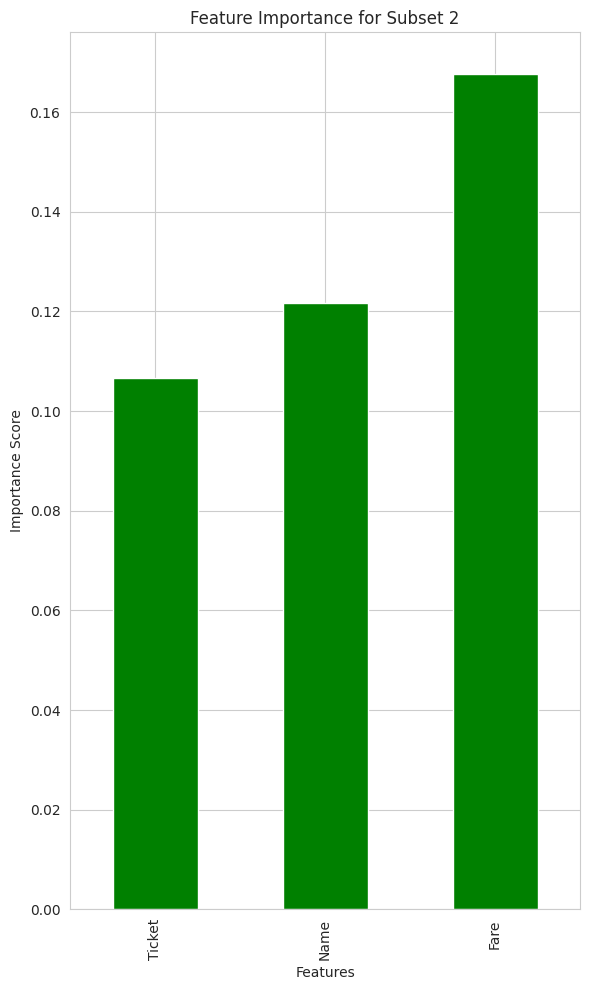

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import files  # For file download                                          ##### Next

# Assuming df is already loaded (e.g., df = pd.read_csv('heart_disease.csv'))

# Prepare features (X) and target (y)
X = df.drop(columns='Survived')
y = df['Survived']


# Full train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest on full training data to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_full, y_train_full)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
sorted_features = feature_importance.sort_values(ascending=False)

# Select features for subsets
#subset_1_features = sorted_features.index[[0, 3, 4, 7, 8, 11]]
#subset_2_features = sorted_features.index[[1, 2, 5, 6, 9, 10]]
# Define subsets using index positions
subset_1_features = sorted_features.index[[0, 2, 3]]  # e.g., PassengerId, Sex, Age
subset_2_features = sorted_features.index[[1, 4, 5]]  # e.g., Name, Ticket, Fare


# Create subset DataFrames
X_subset_1 = X[subset_1_features]
X_subset_2 = X[subset_2_features]

# Subset-wise split for training and validation
X_train_sub1, X_val_sub1, y_train_sub1, y_val_sub1 = train_test_split(
    X_subset_1.loc[X_train_full.index], y_train_full, test_size=0.2, random_state=42
)
X_train_sub2, X_val_sub2, y_train_sub2, y_val_sub2 = train_test_split(
    X_subset_2.loc[X_train_full.index], y_train_full, test_size=0.2, random_state=42
)

# X_test subsets for later use
X_test_sub1 = X_subset_1.loc[X_test.index]
X_test_sub2 = X_subset_2.loc[X_test.index]

# -------- Subset 1 Visualization & Save --------
plt.figure(figsize=(6, 10))
subset_1_importance = feature_importance[subset_1_features]
subset_1_importance.sort_values(ascending=True).plot(kind='bar', color='orange')
plt.title("Feature Importance for Subset 1")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.savefig("Feature_Importance_Subset_1.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the image
files.download("Feature_Importance_Subset_1.png")


# -------- Subset 2 Visualization & Save --------
plt.figure(figsize=(6, 10))
subset_2_importance = feature_importance[subset_2_features]
subset_2_importance.sort_values(ascending=True).plot(kind='bar', color='green')
plt.title("Feature Importance for Subset 2")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.savefig("Feature_Importance_Subset_2.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the image
files.download("Feature_Importance_Subset_2.png")

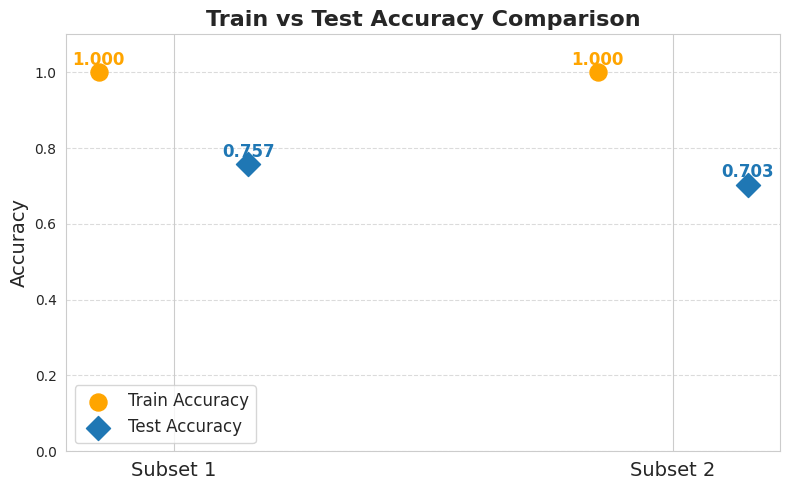

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_sub1, X_val_sub1, y_train_sub1, y_val_sub1, X_test_sub1, X_test_sub2, y_test
# are defined in previous cells

# Train models on the subsets
rf_subset1 = RandomForestClassifier(random_state=42)
rf_subset1.fit(X_train_sub1, y_train_sub1)

rf_subset2 = RandomForestClassifier(random_state=42)
rf_subset2.fit(X_train_sub2, y_train_sub2) # Note: X_train_sub2 is used here

# Calculate accuracies
train_acc_sub1 = accuracy_score(y_train_sub1, rf_subset1.predict(X_train_sub1))
test_acc_sub1 = accuracy_score(y_test, rf_subset1.predict(X_test_sub1)) # Note: X_test_sub1 is used here

train_acc_sub2 = accuracy_score(y_train_sub2, rf_subset2.predict(X_train_sub2)) # Note: X_train_sub2 is used here
test_acc_sub2 = accuracy_score(y_test, rf_subset2.predict(X_test_sub2)) # Note: X_test_sub2 is used here


labels = ['Subset 1', 'Subset 2']
train_acc = [train_acc_sub1, train_acc_sub2]
test_acc = [test_acc_sub1, test_acc_sub2]

x = np.arange(len(labels))  # label locations
width = 0.3  # dot spacing

plt.figure(figsize=(8,5))

# Train dots
plt.scatter(x - width/2, train_acc, color='#FFA500', s=150, label='Train Accuracy', marker='o')

# Test dots
plt.scatter(x + width/2, test_acc, color='#1f77b4', s=150, label='Test Accuracy', marker='D')

# Adding text labels on dots
for i in range(len(labels)):
    plt.text(x[i] - width/2, train_acc[i] + 0.02, f'{train_acc[i]:.3f}', ha='center', fontsize=12, fontweight='bold', color='#FFA500')
    plt.text(x[i] + width/2, test_acc[i] + 0.02, f'{test_acc[i]:.3f}', ha='center', fontsize=12, fontweight='bold', color='#1f77b4')

plt.xticks(x, labels, fontsize=14)
plt.ylim(0, 1.1)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Train vs Test Accuracy Comparison', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('train_test_accuracy_dotplot.png', dpi=300, bbox_inches='tight')
plt.show()

files.download('train_test_accuracy_dotplot.png')

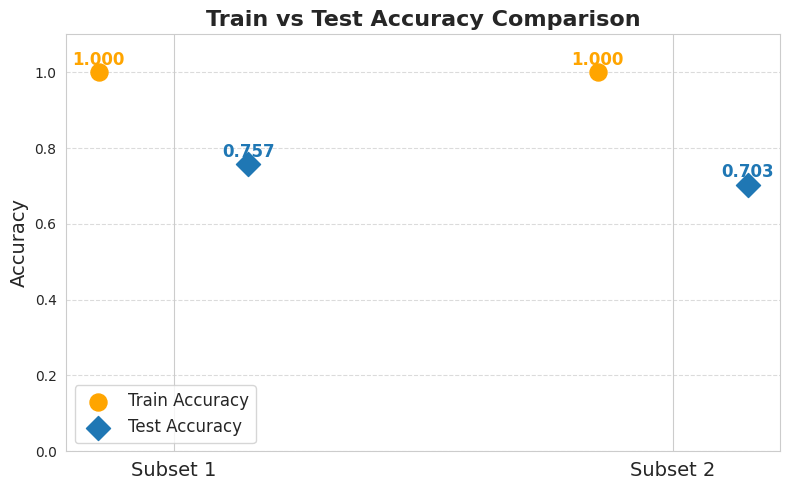

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt    ### From ChatGpt
import numpy as np
from google.colab import files

# ✅ Define accuracy values (example only — use your real values)
train_acc_sub1 = 1.000
train_acc_sub2 = 1.000
test_acc_sub1 = 0.757
test_acc_sub2 = 0.703

labels = ['Subset 1', 'Subset 2']
train_acc = [train_acc_sub1, train_acc_sub2]
test_acc = [test_acc_sub1, test_acc_sub2]

x = np.arange(len(labels))  # label locations
width = 0.3  # dot spacing

plt.figure(figsize=(8,5))

# Train dots
plt.scatter(x - width/2, train_acc, color='#FFA500', s=150, label='Train Accuracy', marker='o')

# Test dots
plt.scatter(x + width/2, test_acc, color='#1f77b4', s=150, label='Test Accuracy', marker='D')

# Adding text labels on dots
for i in range(len(labels)):
    plt.text(x[i] - width/2, train_acc[i] + 0.02, f'{train_acc[i]:.3f}', ha='center', fontsize=12, fontweight='bold', color='#FFA500')
    plt.text(x[i] + width/2, test_acc[i] + 0.02, f'{test_acc[i]:.3f}', ha='center', fontsize=12, fontweight='bold', color='#1f77b4')

plt.xticks(x, labels, fontsize=14)
plt.ylim(0, 1.1)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Train vs Test Accuracy Comparison', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('train_test_accuracy_dotplot.png', dpi=300, bbox_inches='tight')
plt.show()

files.download('train_test_accuracy_dotplot.png')


Overfitting Reduction Using Tree Depth Limitation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Subset 2 model with limited tree depth to reduce overfitting
rf_subset2_limited = RandomForestClassifier(max_depth=4, random_state=42)
rf_subset2_limited.fit(X_train_sub2, y_train_sub2)

# Predict on training and test sets
train_preds_sub2_limited = rf_subset2_limited.predict(X_train_sub2)
test_preds_sub2_limited = rf_subset2_limited.predict(X_test_sub2)

# Calculate accuracies
train_acc_sub2_limited = accuracy_score(y_train_sub2, train_preds_sub2_limited)
test_acc_sub2_limited = accuracy_score(y_test, test_preds_sub2_limited)

# Print results
print(f"Subset 2 (Limited Depth) - Train Accuracy: {train_acc_sub2_limited:.4f}")
print(f"Subset 2 (Limited Depth) - Test Accuracy: {test_acc_sub2_limited:.4f}")

Subset 2 (Limited Depth) - Train Accuracy: 0.8017
Subset 2 (Limited Depth) - Test Accuracy: 0.6486


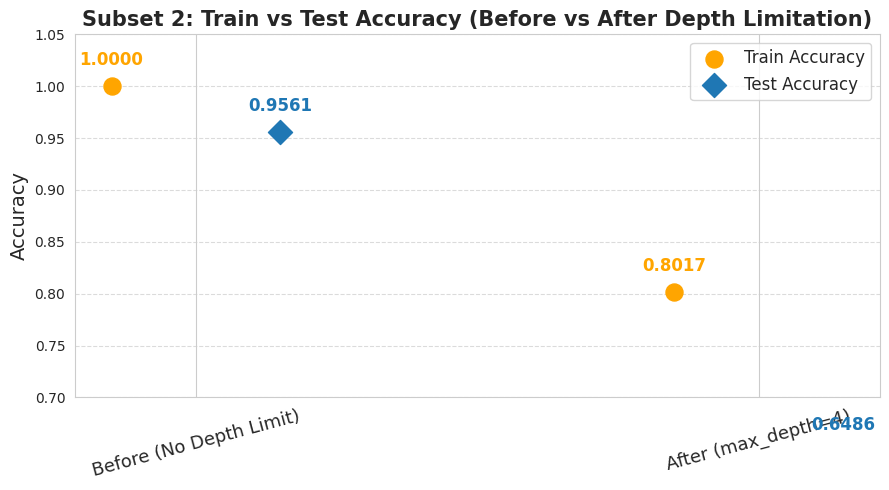

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Labels
labels = ['Before (No Depth Limit)', 'After (max_depth=4)']
train_acc = [1.0000, 0.8017]
test_acc = [0.9561, 0.6486]

x = np.arange(len(labels))  # label locations
width = 0.3  # dot spacing

plt.figure(figsize=(9, 5))

# Train dots
plt.scatter(x - width/2, train_acc, color='#FFA500', s=150, label='Train Accuracy', marker='o')

# Test dots
plt.scatter(x + width/2, test_acc, color='#1f77b4', s=150, label='Test Accuracy', marker='D')

# Labels on dots
for i in range(len(labels)):
    plt.text(x[i] - width/2, train_acc[i] + 0.02, f'{train_acc[i]:.4f}', ha='center', fontsize=12, fontweight='bold', color='#FFA500')
    plt.text(x[i] + width/2, test_acc[i] + 0.02, f'{test_acc[i]:.4f}', ha='center', fontsize=12, fontweight='bold', color='#1f77b4')

plt.xticks(x, labels, fontsize=13, rotation=15)
plt.ylim(0.7, 1.05)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Subset 2: Train vs Test Accuracy (Before vs After Depth Limitation)', fontsize=15, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('subset2_depth_tuning_accuracy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

files.download('subset2_depth_tuning_accuracy_comparison.png')


Model Training and Disagreement Analysis

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import additional libraries for XGBoost, CatBoost, LightGBM
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Split train-test for both subsets with same random_state for y
X_train_1, X_test_1, y_train, y_test = train_test_split(X_subset_1, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, _, _ = train_test_split(X_subset_2, y, test_size=0.2, random_state=42)

# Initialize all models
models_subset_1 = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

models_subset_2 = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Train all models on subset 1
for name, model in models_subset_1.items():
    model.fit(X_train_1, y_train)

# Train all models on subset 2
for name, model in models_subset_2.items():
    model.fit(X_train_2, y_train)

# Predict on test data for subset 1 and subset 2
preds_1 = {}
preds_2 = {}

for name in models_subset_1.keys():
    preds_1[name] = models_subset_1[name].predict(X_test_1)
    preds_2[name] = models_subset_2[name].predict(X_test_2)

# Calculate disagreements for each model
disagreement_indices = {}

for name in models_subset_1.keys():
    disagreements = preds_1[name] != preds_2[name]
    disagreement_indices[name] = [i for i, disagreed in enumerate(disagreements) if disagreed]

# Print disagreement indices
for name, indices in disagreement_indices.items():
    print(f"{name} Disagreement Indices:", indices)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:48:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:48:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:48:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:48:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

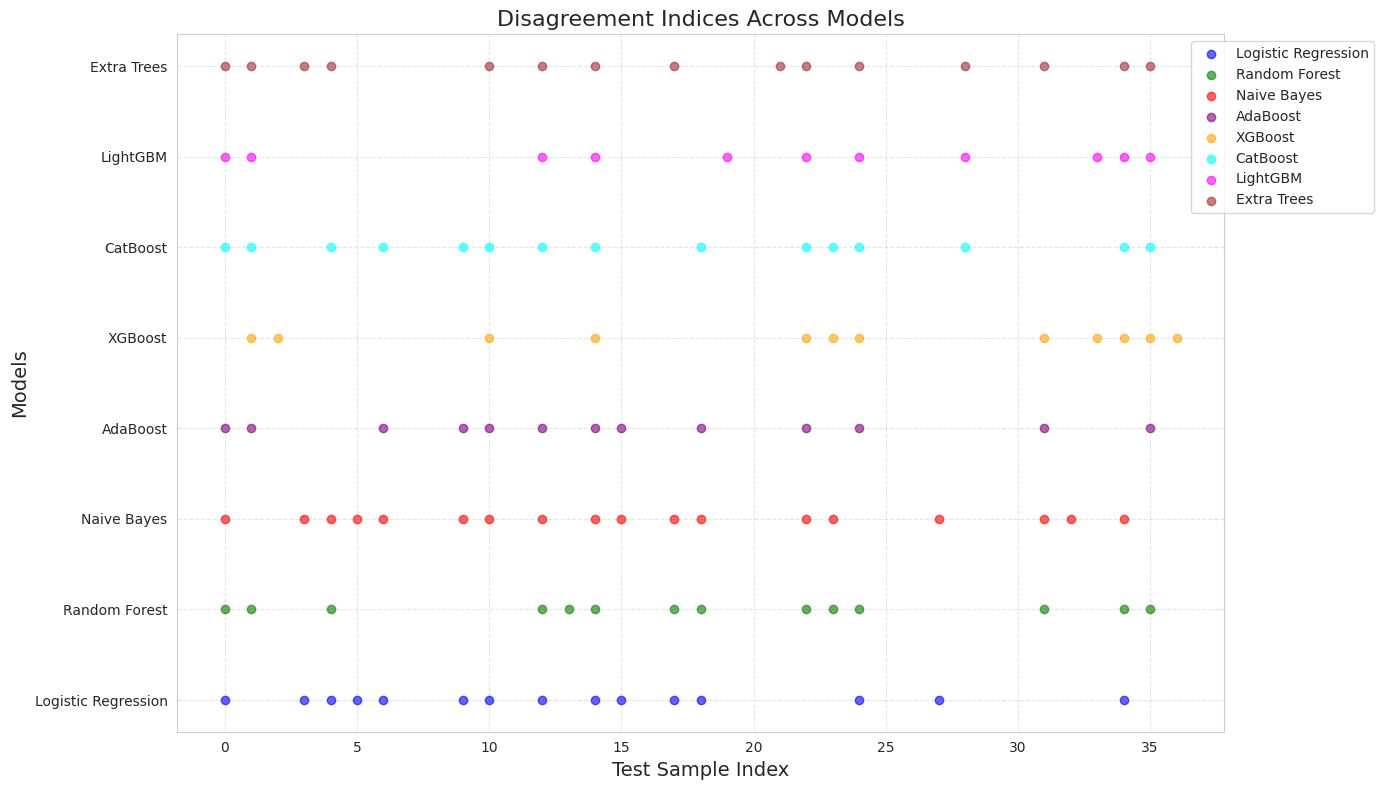

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Split train-test
# X_train_1, X_test_1, y_train, y_test = train_test_split(X_subset_1, y, test_size=0.2, random_state=42)
# X_train_2, X_test_2, _, _ = train_test_split(X_subset_2, y, test_size=0.2, random_state=42)

# Model dictionary for subset 1 and 2
models_1 = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

models_2 = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Train all models
for name in models_1:
    models_1[name].fit(X_train_1, y_train)
    models_2[name].fit(X_train_2, y_train)

# Predict on test sets
preds_1 = {name: model.predict(X_test_1) for name, model in models_1.items()}
preds_2 = {name: model.predict(X_test_2) for name, model in models_2.items()}

# Calculate disagreements
disagreement_indices = {}
for name in preds_1.keys():
    disag = preds_1[name] != preds_2[name]
    disagreement_indices[name] = [i for i, val in enumerate(disag) if val]

# Visualization
plt.figure(figsize=(14, 8))

colors = {
    "Logistic Regression": 'blue',
    "Random Forest": 'green',
    "Naive Bayes": 'red',
    "AdaBoost": 'purple',
    "XGBoost": 'orange',
    "CatBoost": 'cyan',
    "LightGBM": 'magenta',
    "Extra Trees": 'brown'
}

# Assign y positions for each model for better visualization
y_positions = {
    "Logistic Regression": 1,
    "Random Forest": 2,
    "Naive Bayes": 3,
    "AdaBoost": 4,
    "XGBoost": 5,
    "CatBoost": 6,
    "LightGBM": 7,
    "Extra Trees": 8
}

for model_name, indices in disagreement_indices.items():
    y_pos = [y_positions[model_name]] * len(indices)
    plt.scatter(indices, y_pos, color=colors[model_name], alpha=0.6, label=model_name)

plt.title('Disagreement Indices Across Models', fontsize=16)
plt.xlabel('Test Sample Index', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.yticks(list(y_positions.values()), list(y_positions.keys()))
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("Disagreement_Indices_Across_Models.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the saved figure (Google Colab only)
from google.colab import files
files.download("Disagreement_Indices_Across_Models.png")


Confuse Matrix Logistic Regression

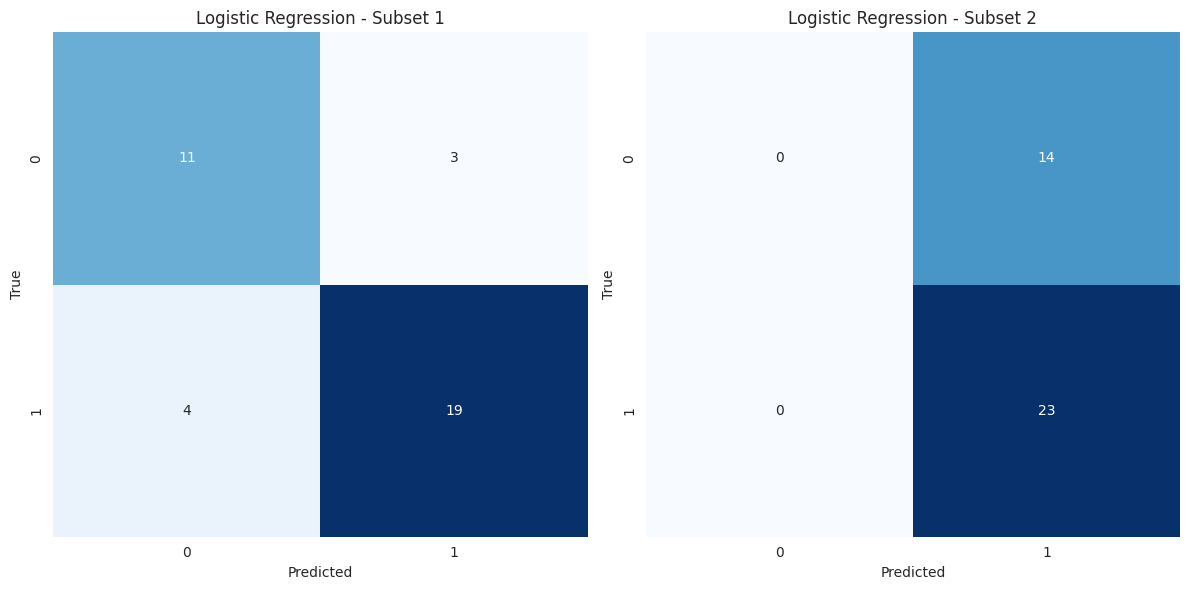

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Train Logistic Regression models on Subset 1 and Subset 2
lr_model_1 = LogisticRegression(max_iter=1000).fit(X_train_1, y_train)
lr_model_2 = LogisticRegression(max_iter=1000).fit(X_train_2, y_train)

# Predict on test data for Subset 1 and Subset 2
lr_preds_1 = lr_model_1.predict(X_test_1)
lr_preds_2 = lr_model_2.predict(X_test_2)

# Confusion matrices for Logistic Regression
lr_cm_1 = confusion_matrix(y_test, lr_preds_1)
lr_cm_2 = confusion_matrix(y_test, lr_preds_2)

# Visualize Logistic Regression Confusion Matrices for Subset 1 and Subset 2
plt.figure(figsize=(12, 6))

# Subset 1 confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(lr_cm_1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression - Subset 1')
plt.xlabel('Predicted')
plt.ylabel('True')

# Subset 2 confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(lr_cm_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression - Subset 2')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
# Save the figure
plt.savefig("Logistic_Regression_Subset_Confusion_Matrices.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the saved image (for Google Colab)
files.download("Logistic_Regression_Subset_Confusion_Matrices.png")


Confuse Matrix Random Forest

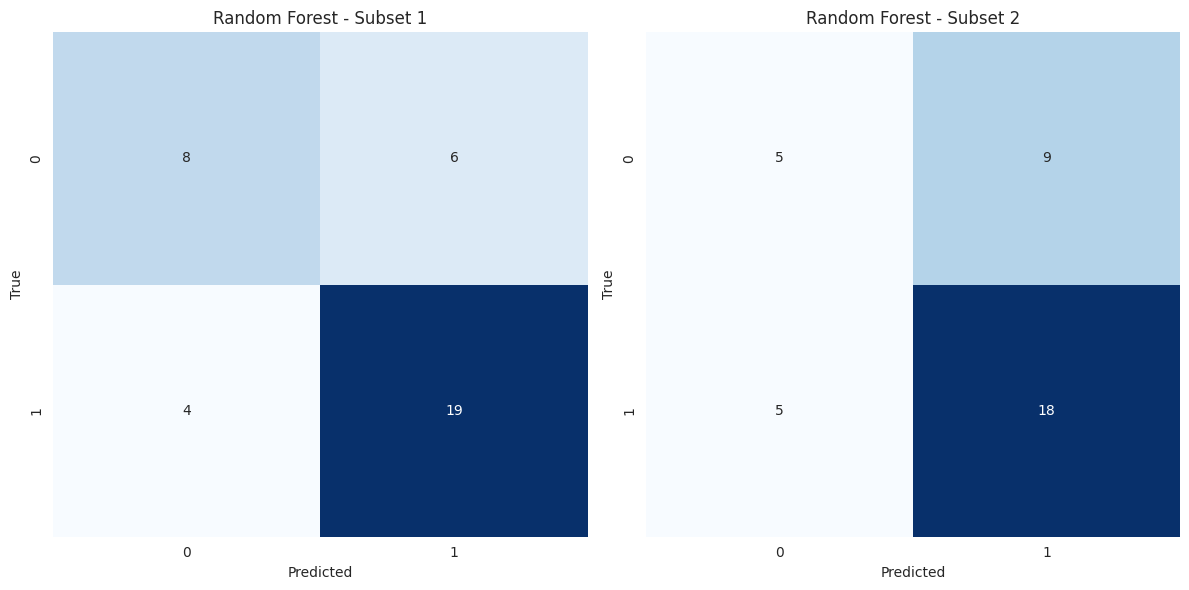

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Train Random Forest models on Subset 1 and Subset 2
rf_model_1 = RandomForestClassifier(random_state=42).fit(X_train_1, y_train)
rf_model_2 = RandomForestClassifier(random_state=42).fit(X_train_2, y_train)

# Predict on test data for Subset 1 and Subset 2
rf_preds_1 = rf_model_1.predict(X_test_1)
rf_preds_2 = rf_model_2.predict(X_test_2)

# Confusion matrices for Random Forest
rf_cm_1 = confusion_matrix(y_test, rf_preds_1)
rf_cm_2 = confusion_matrix(y_test, rf_preds_2)

# Visualize Random Forest Confusion Matrices for Subset 1 and Subset 2
plt.figure(figsize=(12, 6))

# Subset 1 confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm_1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest - Subset 1')
plt.xlabel('Predicted')
plt.ylabel('True')

# Subset 2 confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest - Subset 2')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.savefig("Random_Forest_Subset_Confusion_Matrices.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the saved image (works in Google Colab)
files.download("Random_Forest_Subset_Confusion_Matrices.png")


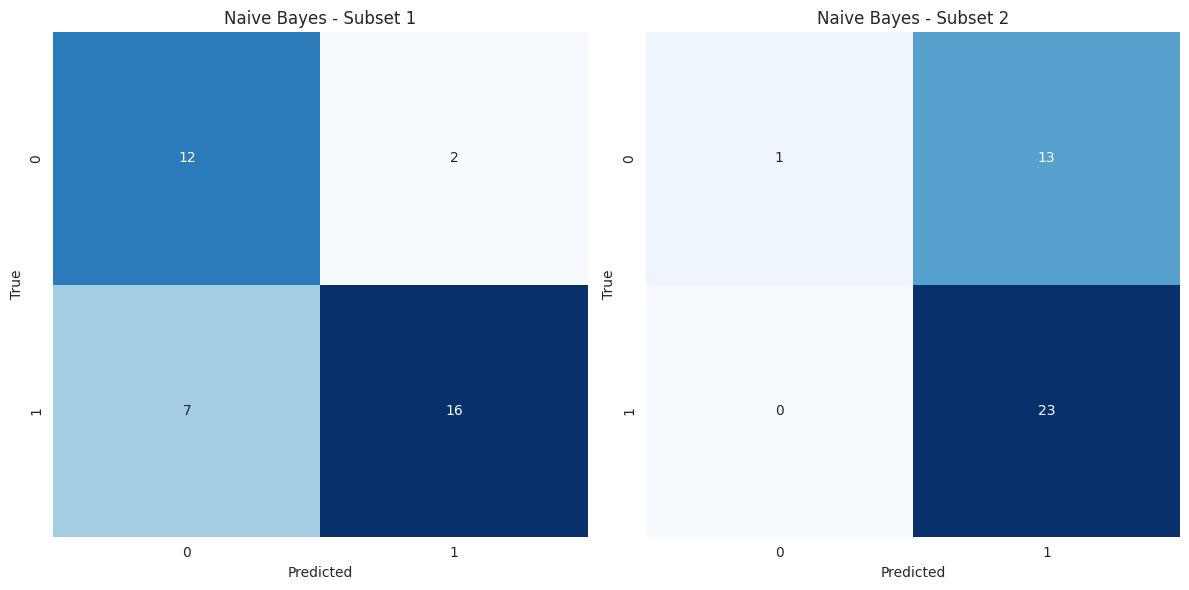

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# Train Naive Bayes models on Subset 1 and Subset 2
nb_model_1 = GaussianNB().fit(X_train_1, y_train)
nb_model_2 = GaussianNB().fit(X_train_2, y_train)

# Predict on test data for Subset 1 and Subset 2
nb_preds_1 = nb_model_1.predict(X_test_1)
nb_preds_2 = nb_model_2.predict(X_test_2)

# Confusion matrices for Naive Bayes
nb_cm_1 = confusion_matrix(y_test, nb_preds_1)
nb_cm_2 = confusion_matrix(y_test, nb_preds_2)

# Visualize Naive Bayes Confusion Matrices for Subset 1 and Subset 2
plt.figure(figsize=(12, 6))

# Subset 1 confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(nb_cm_1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes - Subset 1')
plt.xlabel('Predicted')
plt.ylabel('True')

# Subset 2 confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(nb_cm_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes - Subset 2')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
# Save the figure
plt.savefig("Naive_Bayes_Subset_Confusion_Matrices.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the image (for Google Colab)
files.download("Naive_Bayes_Subset_Confusion_Matrices.png")

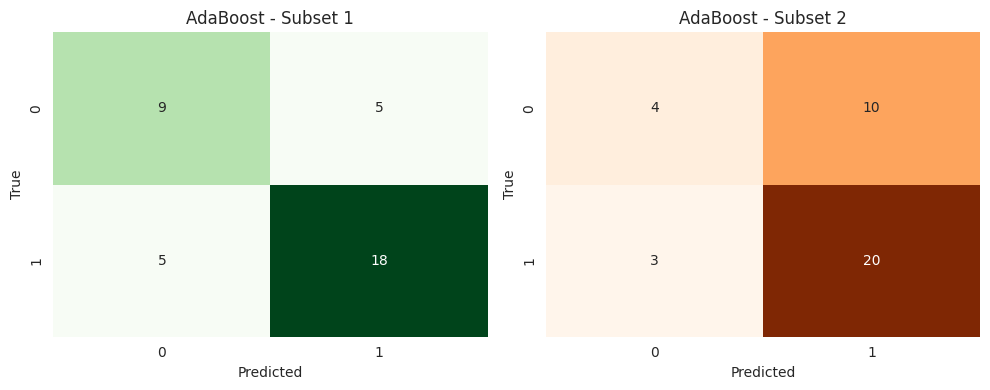

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

ada_model = AdaBoostClassifier(random_state=42)

# Train and predict on Subset 1
ada_model.fit(X_train_1, y_train)
ada_preds_1 = ada_model.predict(X_test_1)
ada_cm_1 = confusion_matrix(y_test, ada_preds_1)

# Train and predict on Subset 2
ada_model.fit(X_train_2, y_train)
ada_preds_2 = ada_model.predict(X_test_2)
ada_cm_2 = confusion_matrix(y_test, ada_preds_2)

# Plot confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(ada_cm_1, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('AdaBoost - Subset 1')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(ada_cm_2, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('AdaBoost - Subset 2')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
# Save the figure
plt.savefig("AdaBoost_Subset_Confusion_Matrices.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the image (if on Colab)
files.download("AdaBoost_Subset_Confusion_Matrices.png")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:49:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:49:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


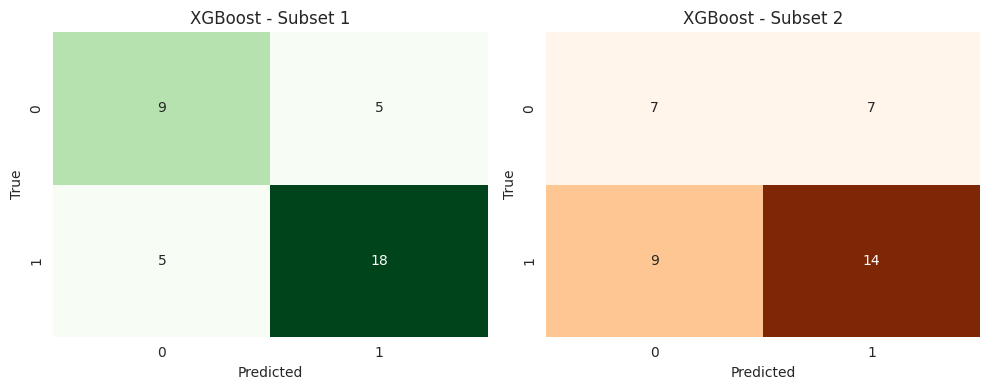

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train and predict on Subset 1
xgb_model.fit(X_train_1, y_train)
xgb_preds_1 = xgb_model.predict(X_test_1)
xgb_cm_1 = confusion_matrix(y_test, xgb_preds_1)

# Train and predict on Subset 2
xgb_model.fit(X_train_2, y_train)
xgb_preds_2 = xgb_model.predict(X_test_2)
xgb_cm_2 = confusion_matrix(y_test, xgb_preds_2)

# Plot confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(xgb_cm_1, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('XGBoost - Subset 1')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(xgb_cm_2, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('XGBoost - Subset 2')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
# Save the plot
plt.savefig("XGBoost_Subset_Confusion_Matrices.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the image (only works in Google Colab)
files.download("XGBoost_Subset_Confusion_Matrices.png")


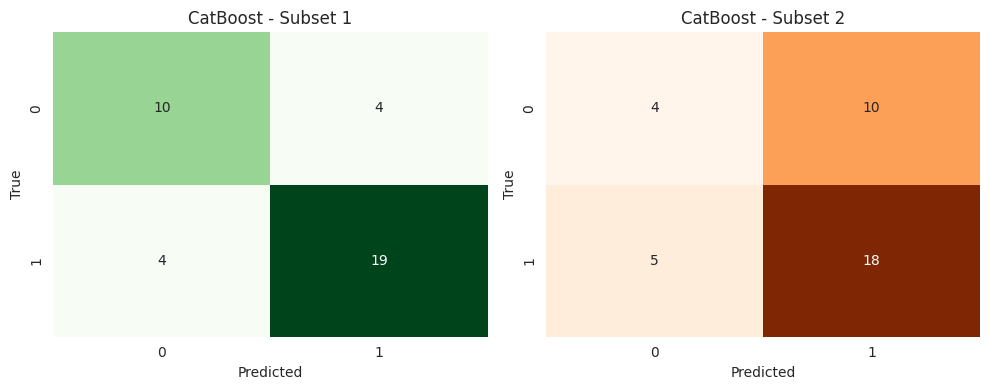

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cat_model = CatBoostClassifier(verbose=0, random_state=42)

# Train and predict on Subset 1
cat_model.fit(X_train_1, y_train)
cat_preds_1 = cat_model.predict(X_test_1)
cat_cm_1 = confusion_matrix(y_test, cat_preds_1)

# Train and predict on Subset 2
cat_model.fit(X_train_2, y_train)
cat_preds_2 = cat_model.predict(X_test_2)
cat_cm_2 = confusion_matrix(y_test, cat_preds_2)

# Plot confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cat_cm_1, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('CatBoost - Subset 1')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cat_cm_2, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('CatBoost - Subset 2')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()

# Save the plot
plt.savefig("CatBoost_Subset_Confusion_Matrices.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the image (only in Google Colab)
files.download("CatBoost_Subset_Confusion_Matrices.png")

[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

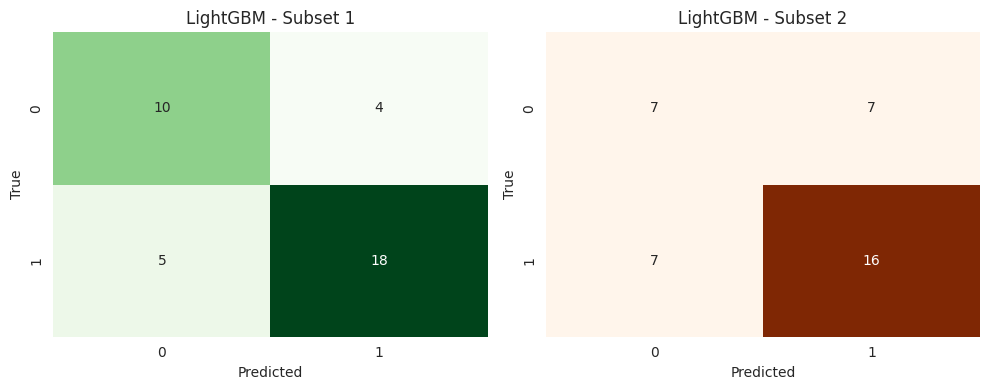

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lgbm_model = LGBMClassifier(random_state=42)

# Train and predict on Subset 1
lgbm_model.fit(X_train_1, y_train)
lgbm_preds_1 = lgbm_model.predict(X_test_1)
lgbm_cm_1 = confusion_matrix(y_test, lgbm_preds_1)

# Train and predict on Subset 2
lgbm_model.fit(X_train_2, y_train)
lgbm_preds_2 = lgbm_model.predict(X_test_2)
lgbm_cm_2 = confusion_matrix(y_test, lgbm_preds_2)

# Plot confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(lgbm_cm_1, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('LightGBM - Subset 1')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(lgbm_cm_2, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('LightGBM - Subset 2')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.savefig("LightGBM_Confusion_Matrices.png", dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download("LightGBM_Confusion_Matrices.png")



[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

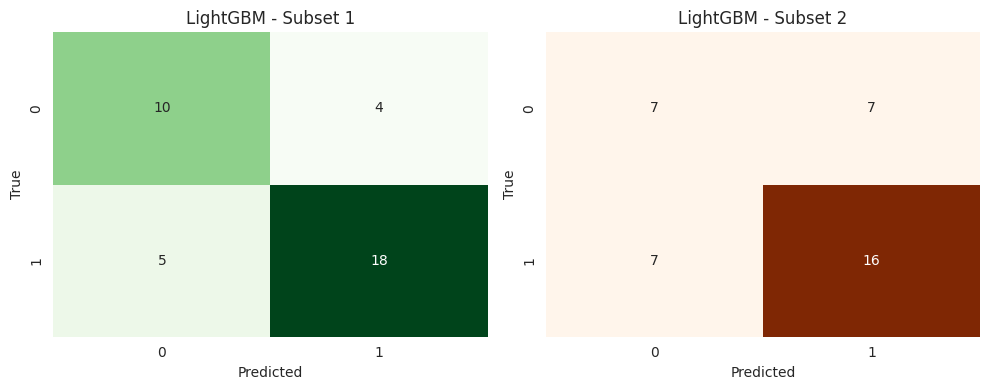

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lgbm_model = LGBMClassifier(random_state=42)

# Train and predict on Subset 1
lgbm_model.fit(X_train_1, y_train)
lgbm_preds_1 = lgbm_model.predict(X_test_1)
lgbm_cm_1 = confusion_matrix(y_test, lgbm_preds_1)

# Train and predict on Subset 2
lgbm_model.fit(X_train_2, y_train)
lgbm_preds_2 = lgbm_model.predict(X_test_2)
lgbm_cm_2 = confusion_matrix(y_test, lgbm_preds_2)

# Plot confusion matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(lgbm_cm_1, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('LightGBM - Subset 1')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(lgbm_cm_2, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('LightGBM - Subset 2')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.savefig("LightGBM_Confusion_Matrices.png", dpi=300, bbox_inches='tight')
plt.show()
from google.colab import files
files.download("LightGBM_Confusion_Matrices.png")



Accuracy Calculation

Table for Disagreements (Logistic Regression)

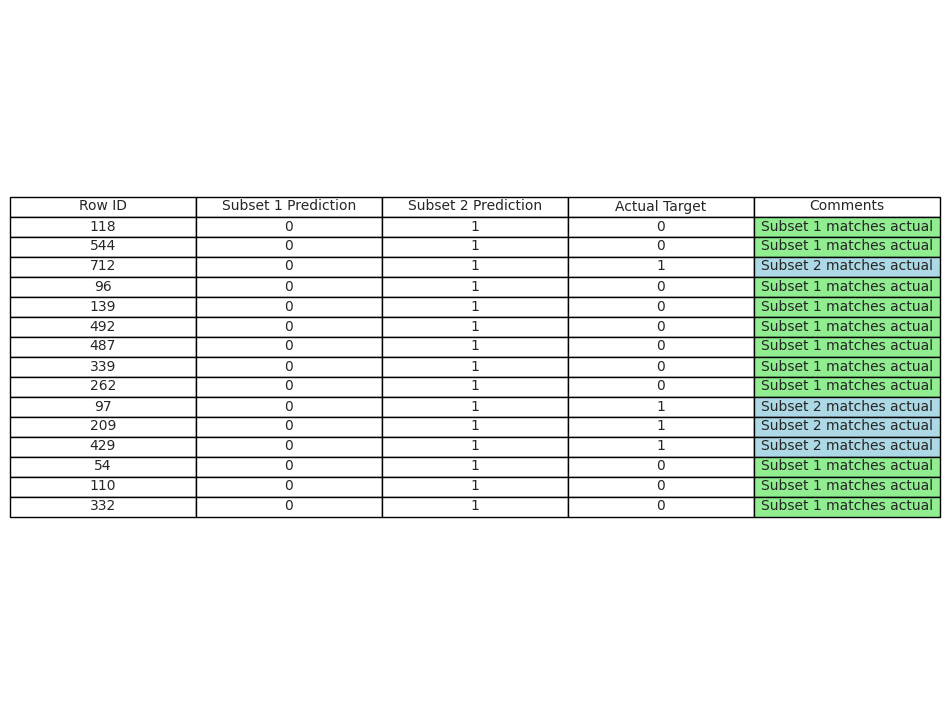

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from google.colab import files

# Step 2: Split your subsets and target
X_train_1, X_test_1, y_train_1, y_test = train_test_split(X_subset_1, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, _      = train_test_split(X_subset_2, y, test_size=0.2, random_state=42)

# Step 3: Train Logistic Regression on both subsets
lr_model_1 = LogisticRegression(max_iter=1000)
lr_model_1.fit(X_train_1, y_train_1)

lr_model_2 = LogisticRegression(max_iter=1000)
lr_model_2.fit(X_train_2, y_train_2)

# Step 4: Predict
lr_preds_1 = lr_model_1.predict(X_test_1)
lr_preds_2 = lr_model_2.predict(X_test_2)

# Step 5: Create disagreement DataFrame
lr_disagreements_df = pd.DataFrame({
    'Row ID': X_test_1.index,
    'Subset 1 Prediction': lr_preds_1,
    'Subset 2 Prediction': lr_preds_2,
    'Actual Target': y_test.values
})

# Step 6: Filter disagreements
lr_disagreements_df = lr_disagreements_df[
    lr_disagreements_df['Subset 1 Prediction'] != lr_disagreements_df['Subset 2 Prediction']
]

# Step 7: Comment logic
def add_lr_comments(row):
    if row['Actual Target'] == row['Subset 1 Prediction']:
        return "Subset 1 matches actual"
    elif row['Actual Target'] == row['Subset 2 Prediction']:
        return "Subset 2 matches actual"
    else:
        return "Neither matches actual"

lr_disagreements_df['Comments'] = lr_disagreements_df.apply(add_lr_comments, axis=1)

# Step 8: Display only first 20 for visual table
lr_display_df = lr_disagreements_df.head(20)

# Step 9: Color function
def get_lr_color(comment):
    if comment == "Subset 1 matches actual":
        return 'lightgreen'
    elif comment == "Subset 2 matches actual":
        return 'lightblue'
    else:
        return 'lightcoral'

colors_lr = [[get_lr_color(row['Comments']) if col == 'Comments' else 'white'
              for col in lr_display_df.columns] for _, row in lr_display_df.iterrows()]

# Step 10: Plot table
fig, ax = plt.subplots(figsize=(10, len(lr_display_df)*0.6))
ax.axis('off')

table = ax.table(cellText=lr_display_df.values,
                 colLabels=lr_display_df.columns,
                 cellColours=colors_lr,
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Step 11: Save and Download PNG
plt.savefig("lr_disagreements_table.png", bbox_inches='tight', dpi=300)
plt.show()
files.download("lr_disagreements_table.png")


Table for Disagreements (Random Forest)

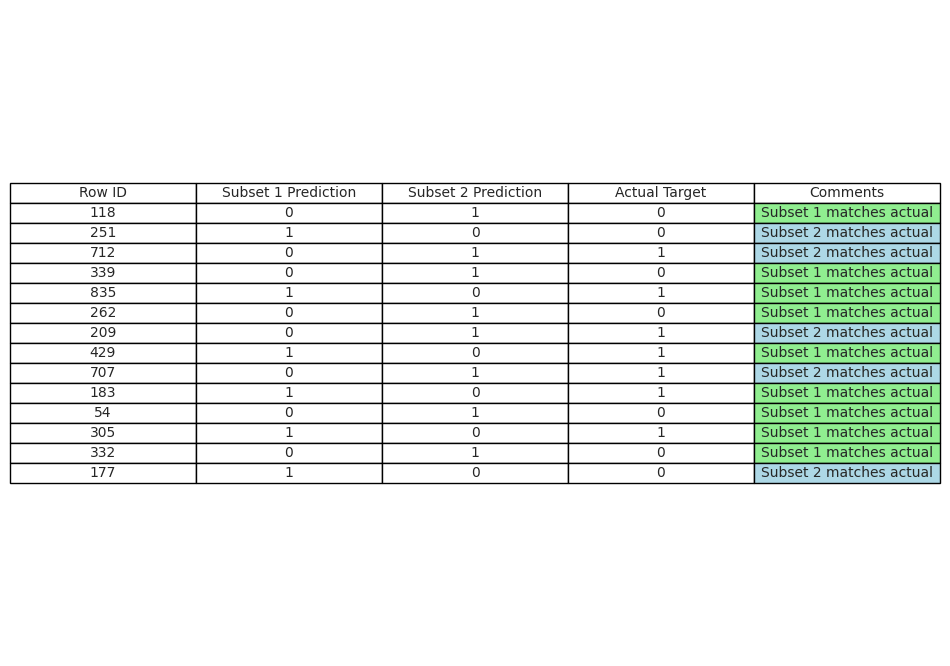

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Necessary imports
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Step 2: Create the disagreements DataFrame
rf_disagreements_df = pd.DataFrame({
    'Row ID': X_test_1.index,
    'Subset 1 Prediction': rf_preds_1,
    'Subset 2 Prediction': rf_preds_2,
    'Actual Target': y_test.values
})

# Step 3: Filter rows where the two subsets disagree
rf_disagreements_df = rf_disagreements_df[
    rf_disagreements_df['Subset 1 Prediction'] != rf_disagreements_df['Subset 2 Prediction']
]

# Step 4: Add a comment column
def add_rf_comments(row):
    if row['Actual Target'] == row['Subset 1 Prediction']:
        return "Subset 1 matches actual"
    elif row['Actual Target'] == row['Subset 2 Prediction']:
        return "Subset 2 matches actual"
    else:
        return "Neither matches actual"

rf_disagreements_df['Comments'] = rf_disagreements_df.apply(add_rf_comments, axis=1)

# Step 5: Take only the first 20 rows for compact PNG visualization
rf_display_df = rf_disagreements_df.head(20)

# Step 6: Define color mapping function
def get_rf_color(comment):
    if comment == "Subset 1 matches actual":
        return 'lightgreen'
    elif comment == "Subset 2 matches actual":
        return 'lightblue'
    else:
        return 'lightcoral'

# Step 7: Create color matrix for the table
colors_rf = [[get_rf_color(row['Comments']) if col == 'Comments' else 'white'
              for col in rf_display_df.columns] for _, row in rf_display_df.iterrows()]

# Step 8: Plot table with matplotlib
fig, ax = plt.subplots(figsize=(10, len(rf_display_df)*0.6))
ax.axis('off')

table = ax.table(cellText=rf_display_df.values,
                 colLabels=rf_display_df.columns,
                 cellColours=colors_rf,
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Step 9: Save as PNG
plt.savefig("rf_disagreements_table.png", bbox_inches='tight', dpi=300)
plt.show()

# Step 10: Download the PNG file
files.download("rf_disagreements_table.png")


Table for Disagreements (Naive Bayes)

Naive Bayes - Number of disagreement rows: 18
Naive Bayes - Number of columns: 4


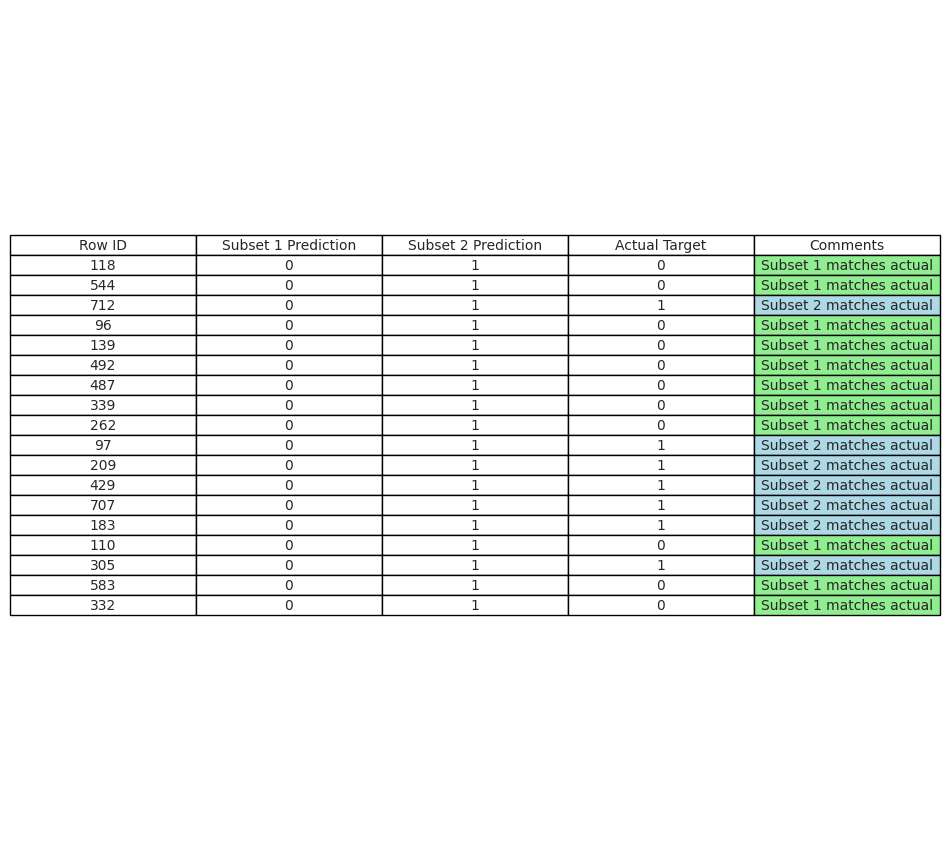

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Create disagreements DataFrame for Naive Bayes
nb_disagreements_df = pd.DataFrame({
    'Row ID': X_test_1.index,
    'Subset 1 Prediction': nb_preds_1,
    'Subset 2 Prediction': nb_preds_2,
    'Actual Target': y_test.values
})

# Step 2: Filter for disagreements only
nb_disagreements_df = nb_disagreements_df[
    nb_disagreements_df['Subset 1 Prediction'] != nb_disagreements_df['Subset 2 Prediction']
]

print(f"Naive Bayes - Number of disagreement rows: {nb_disagreements_df.shape[0]}")
print(f"Naive Bayes - Number of columns: {nb_disagreements_df.shape[1]}")

# Step 3: Add helpful comment column
def add_nb_comments(row):
    if row['Actual Target'] == row['Subset 1 Prediction']:
        return "Subset 1 matches actual"
    elif row['Actual Target'] == row['Subset 2 Prediction']:
        return "Subset 2 matches actual"
    else:
        return "Neither matches actual"

nb_disagreements_df['Comments'] = nb_disagreements_df.apply(add_nb_comments, axis=1)

# Step 4: Select only first 20 rows for PNG preview
nb_display_df = nb_disagreements_df.head(20)

# Step 5: Define color map function
def get_nb_color(comment):
    if comment == "Subset 1 matches actual":
        return 'lightgreen'
    elif comment == "Subset 2 matches actual":
        return 'lightblue'
    else:
        return 'lightcoral'

# Step 6: Generate color matrix for the table
colors_nb = [[get_nb_color(row['Comments']) if col == 'Comments' else 'white'
              for col in nb_display_df.columns] for _, row in nb_display_df.iterrows()]

# Step 7: Plot with matplotlib
fig, ax = plt.subplots(figsize=(10, len(nb_display_df)*0.6))
ax.axis('off')

table = ax.table(cellText=nb_display_df.values,
                 colLabels=nb_display_df.columns,
                 cellColours=colors_nb,
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Step 8: Save and download
plt.savefig("nb_disagreements_table.png", bbox_inches='tight', dpi=300)
plt.show()

files.download("nb_disagreements_table.png")


Table for Disagreements (AdaBoost)

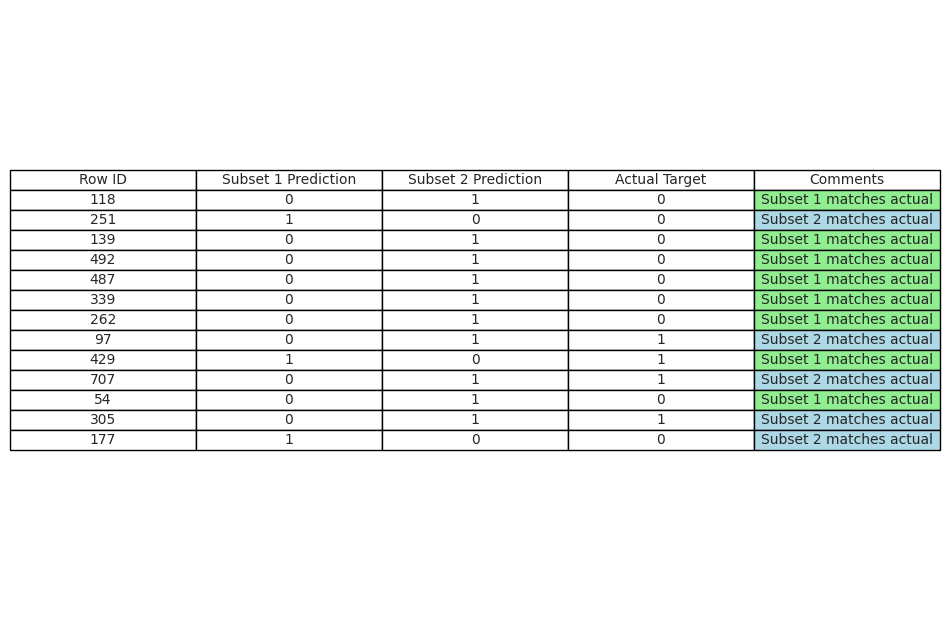

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from google.colab import files

# Step 1: Assume X_subset_1, X_subset_2, and y are already defined

# Step 2: Split data (same random_state for consistent split)
X_train_1, X_test_1, y_train_1, y_test = train_test_split(X_subset_1, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, _      = train_test_split(X_subset_2, y, test_size=0.2, random_state=42)

# Step 3: Train AdaBoost
ada_model_1 = AdaBoostClassifier(random_state=42)
ada_model_1.fit(X_train_1, y_train_1)

ada_model_2 = AdaBoostClassifier(random_state=42)
ada_model_2.fit(X_train_2, y_train_2)

# Step 4: Predict
ada_preds_1 = ada_model_1.predict(X_test_1)
ada_preds_2 = ada_model_2.predict(X_test_2)

# Step 5: Create disagreement table
ada_df = pd.DataFrame({
    'Row ID': X_test_1.index,
    'Subset 1 Prediction': ada_preds_1,
    'Subset 2 Prediction': ada_preds_2,
    'Actual Target': y_test.values
})
ada_df = ada_df[ada_df['Subset 1 Prediction'] != ada_df['Subset 2 Prediction']]

# Step 6: Add Comments
def ada_comment(row):
    if row['Actual Target'] == row['Subset 1 Prediction']:
        return "Subset 1 matches actual"
    elif row['Actual Target'] == row['Subset 2 Prediction']:
        return "Subset 2 matches actual"
    else:
        return "Neither matches actual"

ada_df['Comments'] = ada_df.apply(ada_comment, axis=1)

# Step 7: Prepare display table (top 20 rows)
ada_display_df = ada_df.head(20)

# Step 8: Color function
def get_ada_color(comment):
    if comment == "Subset 1 matches actual":
        return 'lightgreen'
    elif comment == "Subset 2 matches actual":
        return 'lightblue'
    else:
        return 'lightcoral'

colors_ada = [[get_ada_color(row['Comments']) if col == 'Comments' else 'white'
               for col in ada_display_df.columns] for _, row in ada_display_df.iterrows()]

# Step 9: Plot table
fig, ax = plt.subplots(figsize=(10, len(ada_display_df) * 0.6))
ax.axis('off')

table = ax.table(cellText=ada_display_df.values,
                 colLabels=ada_display_df.columns,
                 cellColours=colors_ada,
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Step 10: Save & download
plt.savefig("adaboost_disagreements_table.png", bbox_inches='tight', dpi=300)
plt.show()

files.download("adaboost_disagreements_table.png")


Table for Disagreements (XGBoost)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:49:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:49:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


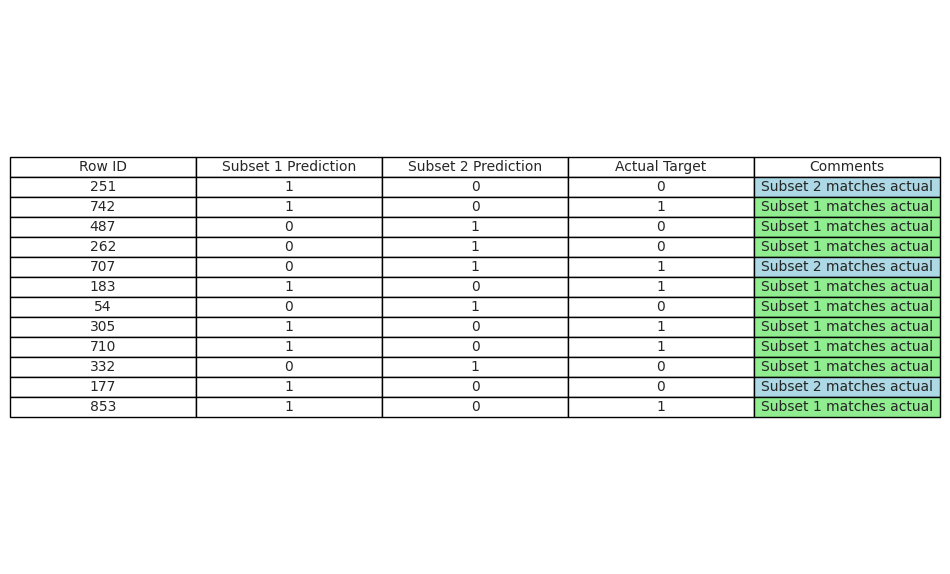

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from google.colab import files

# Step 1: Assume X_subset_1, X_subset_2, and y are already defined

# Step 2: Split data
X_train_1, X_test_1, y_train_1, y_test = train_test_split(X_subset_1, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, _      = train_test_split(X_subset_2, y, test_size=0.2, random_state=42)

# Step 3: Train XGBoost
xgb_model_1 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_1.fit(X_train_1, y_train_1)

xgb_model_2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_2.fit(X_train_2, y_train_2)

# Step 4: Predict
xgb_preds_1 = xgb_model_1.predict(X_test_1)
xgb_preds_2 = xgb_model_2.predict(X_test_2)

# Step 5: Create disagreement table
xgb_df = pd.DataFrame({
    'Row ID': X_test_1.index,
    'Subset 1 Prediction': xgb_preds_1,
    'Subset 2 Prediction': xgb_preds_2,
    'Actual Target': y_test.values
})
xgb_df = xgb_df[xgb_df['Subset 1 Prediction'] != xgb_df['Subset 2 Prediction']]

# Step 6: Add Comments
def xgb_comment(row):
    if row['Actual Target'] == row['Subset 1 Prediction']:
        return "Subset 1 matches actual"
    elif row['Actual Target'] == row['Subset 2 Prediction']:
        return "Subset 2 matches actual"
    else:
        return "Neither matches actual"

xgb_df['Comments'] = xgb_df.apply(xgb_comment, axis=1)

# Step 7: Prepare display table (top 20 disagreements)
xgb_display_df = xgb_df.head(20)

# Step 8: Color function
def get_xgb_color(comment):
    if comment == "Subset 1 matches actual":
        return 'lightgreen'
    elif comment == "Subset 2 matches actual":
        return 'lightblue'
    else:
        return 'lightcoral'

colors_xgb = [[get_xgb_color(row['Comments']) if col == 'Comments' else 'white'
               for col in xgb_display_df.columns] for _, row in xgb_display_df.iterrows()]

# Step 9: Plot table
fig, ax = plt.subplots(figsize=(10, len(xgb_display_df) * 0.6))
ax.axis('off')

table = ax.table(cellText=xgb_display_df.values,
                 colLabels=xgb_display_df.columns,
                 cellColours=colors_xgb,
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Step 10: Save & download
plt.savefig("xgboost_disagreements_table.png", bbox_inches='tight', dpi=300)
plt.show()

files.download("xgboost_disagreements_table.png")


Table for Disagreements (CatBoost)

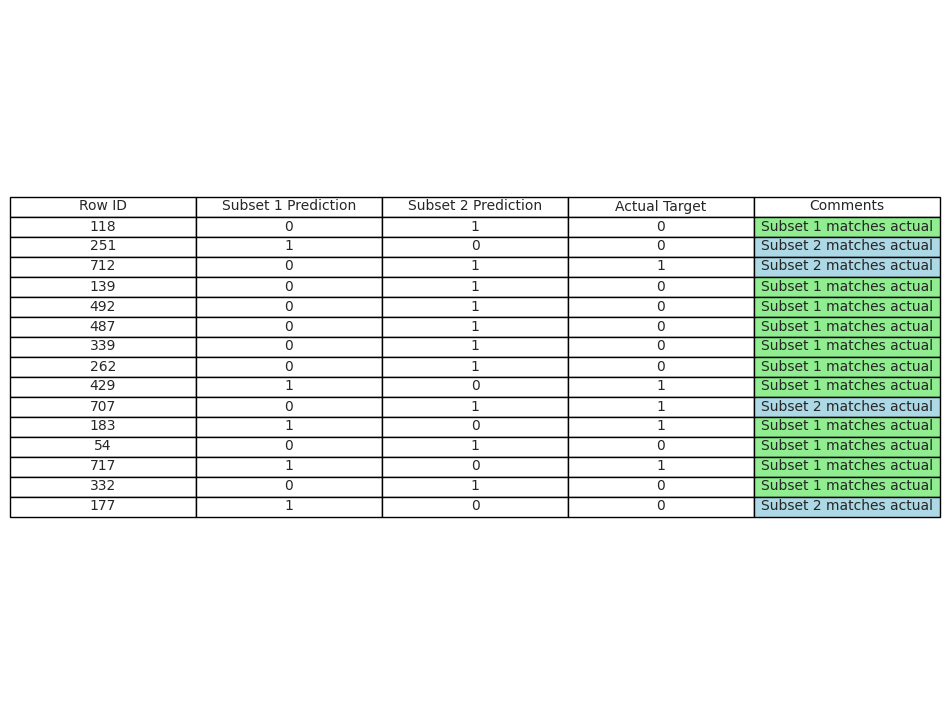

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from google.colab import files

# Step 1: Assume X_subset_1, X_subset_2, and y are already defined

# Step 2: Split data (same random_state for consistent split)
X_train_1, X_test_1, y_train_1, y_test = train_test_split(X_subset_1, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, _      = train_test_split(X_subset_2, y, test_size=0.2, random_state=42)

# Step 3: Train CatBoost
cat_model_1 = CatBoostClassifier(random_seed=42, verbose=0)
cat_model_1.fit(X_train_1, y_train_1)

cat_model_2 = CatBoostClassifier(random_seed=42, verbose=0)
cat_model_2.fit(X_train_2, y_train_2)

# Step 4: Predict
cat_preds_1 = cat_model_1.predict(X_test_1)
cat_preds_2 = cat_model_2.predict(X_test_2)

# Step 5: Create disagreement table
cat_df = pd.DataFrame({
    'Row ID': X_test_1.index,
    'Subset 1 Prediction': cat_preds_1.flatten(),  # CatBoost predict returns array of shape (n,1)
    'Subset 2 Prediction': cat_preds_2.flatten(),
    'Actual Target': y_test.values
})
cat_df = cat_df[cat_df['Subset 1 Prediction'] != cat_df['Subset 2 Prediction']]

# Step 6: Add Comments
def cat_comment(row):
    if row['Actual Target'] == row['Subset 1 Prediction']:
        return "Subset 1 matches actual"
    elif row['Actual Target'] == row['Subset 2 Prediction']:
        return "Subset 2 matches actual"
    else:
        return "Neither matches actual"

cat_df['Comments'] = cat_df.apply(cat_comment, axis=1)

# Step 7: Prepare display table (top 20 rows)
cat_display_df = cat_df.head(20)

# Step 8: Color function
def get_cat_color(comment):
    if comment == "Subset 1 matches actual":
        return 'lightgreen'
    elif comment == "Subset 2 matches actual":
        return 'lightblue'
    else:
        return 'lightcoral'

colors_cat = [[get_cat_color(row['Comments']) if col == 'Comments' else 'white'
               for col in cat_display_df.columns] for _, row in cat_display_df.iterrows()]

# Step 9: Plot table
fig, ax = plt.subplots(figsize=(10, len(cat_display_df) * 0.6))
ax.axis('off')

table = ax.table(cellText=cat_display_df.values,
                 colLabels=cat_display_df.columns,
                 cellColours=colors_cat,
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Step 10: Save & download
plt.savefig("catboost_disagreements_table.png", bbox_inches='tight', dpi=300)
plt.show()

files.download("catboost_disagreements_table.png")


Table for Disagreements (LightGBM)

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from google.colab import files

# Step 2: Assume you have X_subset_1, X_subset_2, and y already
# Split data
X_train_1, X_test_1, y_train_1, y_test = train_test_split(X_subset_1, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, _      = train_test_split(X_subset_2, y, test_size=0.2, random_state=42)

# Step 3: Train LightGBM
lgb_model_1 = lgb.LGBMClassifier(random_state=42)
lgb_model_1.fit(X_train_1, y_train_1)

lgb_model_2 = lgb.LGBMClassifier(random_state=42)
lgb_model_2.fit(X_train_2, y_train_2)

# Step 4: Predict
lgb_preds_1 = lgb_model_1.predict(X_test_1)
lgb_preds_2 = lgb_model_2.predict(X_test_2)

# Step 5: Create disagreement table
lgb_df = pd.DataFrame({
    'Row ID': X_test_1.index,
    'Subset 1 Prediction': lgb_preds_1,
    'Subset 2 Prediction': lgb_preds_2,
    'Actual Target': y_test.values
})
lgb_df = lgb_df[lgb_df['Subset 1 Prediction'] != lgb_df['Subset 2 Prediction']]

# Step 6: Add Comments
def lgb_comment(row):
    if row['Actual Target'] == row['Subset 1 Prediction']:
        return "Subset 1 matches actual"
    elif row['Actual Target'] == row['Subset 2 Prediction']:
        return "Subset 2 matches actual"
    else:
        return "Neither matches actual"
lgb_df['Comments'] = lgb_df.apply(lgb_comment, axis=1)

# Step 7: Prepare display table
lgb_display_df = lgb_df.head(20)

# Step 8: Color function
def get_lgb_color(comment):
    if comment == "Subset 1 matches actual":
        return 'lightgreen'
    elif comment == "Subset 2 matches actual":
        return 'lightblue'
    else:
        return 'lightcoral'

colors_lgb = [[get_lgb_color(row['Comments']) if col == 'Comments' else 'white'
               for col in lgb_display_df.columns] for _, row in lgb_display_df.iterrows()]

# Step 9: Plot table
fig, ax = plt.subplots(figsize=(10, len(lgb_display_df) * 0.6))
ax.axis('off')

table = ax.table(cellText=lgb_display_df.values,
                 colLabels=lgb_display_df.columns,
                 cellColours=colors_lgb,
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Step 10: Save & download
plt.savefig("lightgbm_disagreements_table.png", bbox_inches='tight', dpi=300)
plt.show()

files.download("lightgbm_disagreements_table.png")


[LightGBM] [Info] Number of positive: 100, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 88
[LightGBM] [Info] Number of data points in the train set: 146, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.684932 -> initscore=0.776529
[LightGBM] [Info] Start training from score 0.776529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

Table for Disagreements ( Extra Trees)

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from google.colab import files

# Step 2: Assume you have X_subset_1, X_subset_2, and y already
# Split data
X_train_1, X_test_1, y_train_1, y_test = train_test_split(X_subset_1, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, _      = train_test_split(X_subset_2, y, test_size=0.2, random_state=42)

# Step 3: Train Extra Trees
et_model_1 = ExtraTreesClassifier(random_state=42)
et_model_1.fit(X_train_1, y_train_1)

et_model_2 = ExtraTreesClassifier(random_state=42)
et_model_2.fit(X_train_2, y_train_2)

# Step 4: Predict
et_preds_1 = et_model_1.predict(X_test_1)
et_preds_2 = et_model_2.predict(X_test_2)

# Step 5: Create disagreement table
et_df = pd.DataFrame({
    'Row ID': X_test_1.index,
    'Subset 1 Prediction': et_preds_1,
    'Subset 2 Prediction': et_preds_2,
    'Actual Target': y_test.values
})
et_df = et_df[et_df['Subset 1 Prediction'] != et_df['Subset 2 Prediction']]

# Step 6: Add Comments
def et_comment(row):
    if row['Actual Target'] == row['Subset 1 Prediction']:
        return "Subset 1 matches actual"
    elif row['Actual Target'] == row['Subset 2 Prediction']:
        return "Subset 2 matches actual"
    else:
        return "Neither matches actual"
et_df['Comments'] = et_df.apply(et_comment, axis=1)

# Step 7: Prepare display table (first 20 rows)
et_display_df = et_df.head(20)

# Step 8: Color function
def get_et_color(comment):
    if comment == "Subset 1 matches actual":
        return 'lightgreen'
    elif comment == "Subset 2 matches actual":
        return 'lightblue'
    else:
        return 'lightcoral'

colors_et = [[get_et_color(row['Comments']) if col == 'Comments' else 'white'
              for col in et_display_df.columns] for _, row in et_display_df.iterrows()]

# Step 9: Plot table
fig, ax = plt.subplots(figsize=(10, len(et_display_df)*0.6))
ax.axis('off')

table = ax.table(cellText=et_display_df.values,
                 colLabels=et_display_df.columns,
                 cellColours=colors_et,
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Step 10: Save & download
plt.savefig("extra_trees_disagreements_table.png", bbox_inches='tight', dpi=300)
plt.show()

files.download("extra_trees_disagreements_table.png")


Compare Predictions

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra Trees on Subset 1
extra_model_1 = ExtraTreesClassifier(random_state=42)
extra_model_1.fit(X_train_1, y_train_1)
extra_preds_1 = extra_model_1.predict(X_test_1)

# Train Extra Trees on Subset 2
extra_model_2 = ExtraTreesClassifier(random_state=42)
extra_model_2.fit(X_train_2, y_train_2)
extra_preds_2 = extra_model_2.predict(X_test_2)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files  # যদি Colab এ কাজ করেন

# Create individual DataFrames for each model (make sure all prediction arrays are defined)
results_lr = pd.DataFrame({'S1': lr_preds_1, 'S2': lr_preds_2})
results_rf = pd.DataFrame({'S1': rf_preds_1, 'S2': rf_preds_2})
results_nb = pd.DataFrame({'S1': nb_preds_1, 'S2': nb_preds_2})
results_ada = pd.DataFrame({'S1': ada_preds_1, 'S2': ada_preds_2})
results_xgb = pd.DataFrame({'S1': xgb_preds_1, 'S2': xgb_preds_2})
results_cat = pd.DataFrame({'S1': cat_preds_1, 'S2': cat_preds_2})
results_lgbm = pd.DataFrame({'S1': lgbm_preds_1, 'S2': lgbm_preds_2})
results_extra = pd.DataFrame({'S1': extra_preds_1, 'S2': extra_preds_2})

# Count disagreements for each model
disagreement_counts = {
    'Logistic Regression': (results_lr['S1'] != results_lr['S2']).sum(),
    'Random Forest': (results_rf['S1'] != results_rf['S2']).sum(),
    'Naive Bayes': (results_nb['S1'] != results_nb['S2']).sum(),
    'AdaBoost': (results_ada['S1'] != results_ada['S2']).sum(),
    'XGBoost': (results_xgb['S1'] != results_xgb['S2']).sum(),
    'CatBoost': (results_cat['S1'] != results_cat['S2']).sum(),
    'LightGBM': (results_lgbm['S1'] != results_lgbm['S2']).sum(),
    'Extra Trees': (results_extra['S1'] != results_extra['S2']).sum(),
}

# Print Disagreement Values
print("🔍 Disagreement Counts Between Subset 1 and Subset 2 Predictions:\n")
for model, count in disagreement_counts.items():
    print(f"{model:20s}: {count}")

# Create DataFrame and plot
disagreement_df = pd.DataFrame(disagreement_counts.items(), columns=['Model', 'Disagreement Count'])
disagreement_df = disagreement_df.sort_values(by='Disagreement Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=disagreement_df, x='Disagreement Count', y='Model', palette='magma')
plt.title('Disagreement Count Between Subset 1 and Subset 2 Predictions')
plt.xlabel('Number of Disagreements')
plt.ylabel('ML Models')
plt.tight_layout()

# Save the plot as PNG
plt.savefig("disagreement_counts_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Download the file if on Colab
files.download("disagreement_counts_plot.png")


In [ ]:
from sklearn.metrics import accuracy_score

# Logistic Regression
lr_preds_1 = lr_model_1.predict(X_test_1)
lr_preds_2 = lr_model_2.predict(X_test_2)
probs_1_lr = lr_model_1.predict_proba(X_test_1)[:, 1]
probs_2_lr = lr_model_2.predict_proba(X_test_2)[:, 1]
acc_1_lr = accuracy_score(y_test, lr_preds_1)
acc_2_lr = accuracy_score(y_test, lr_preds_2)

# Random Forest
rf_preds_1 = rf_model_1.predict(X_test_1)
rf_preds_2 = rf_model_2.predict(X_test_2)
probs_1_rf = rf_model_1.predict_proba(X_test_1)[:, 1]
probs_2_rf = rf_model_2.predict_proba(X_test_2)[:, 1]
acc_1_rf = accuracy_score(y_test, rf_preds_1)
acc_2_rf = accuracy_score(y_test, rf_preds_2)

# Naive Bayes
nb_preds_1 = nb_model_1.predict(X_test_1)
nb_preds_2 = nb_model_2.predict(X_test_2)
probs_1_nb = nb_model_1.predict_proba(X_test_1)[:, 1]
probs_2_nb = nb_model_2.predict_proba(X_test_2)[:, 1]
acc_1_nb = accuracy_score(y_test, nb_preds_1)
acc_2_nb = accuracy_score(y_test, nb_preds_2)

# AdaBoost
ada_preds_1 = ada_model_1.predict(X_test_1)
ada_preds_2 = ada_model_2.predict(X_test_2)
probs_1_ada = ada_model_1.predict_proba(X_test_1)[:, 1]
probs_2_ada = ada_model_2.predict_proba(X_test_2)[:, 1]
acc_1_ada = accuracy_score(y_test, ada_preds_1)
acc_2_ada = accuracy_score(y_test, ada_preds_2)

# XGBoost
xgb_preds_1 = xgb_model_1.predict(X_test_1)
xgb_preds_2 = xgb_model_2.predict(X_test_2)
probs_1_xgb = xgb_model_1.predict_proba(X_test_1)[:, 1]
probs_2_xgb = xgb_model_2.predict_proba(X_test_2)[:, 1]
acc_1_xgb = accuracy_score(y_test, xgb_preds_1)
acc_2_xgb = accuracy_score(y_test, xgb_preds_2)

# CatBoost
cat_preds_1 = cat_model_1.predict(X_test_1)
cat_preds_2 = cat_model_2.predict(X_test_2)
probs_1_cat = cat_model_1.predict_proba(X_test_1)[:, 1]
probs_2_cat = cat_model_2.predict_proba(X_test_2)[:, 1]
acc_1_cat = accuracy_score(y_test, cat_preds_1)
acc_2_cat = accuracy_score(y_test, cat_preds_2)

# LightGBM
lgb_preds_1 = lgb_model_1.predict(X_test_1)
lgb_preds_2 = lgb_model_2.predict(X_test_2)
probs_1_lgb = lgb_model_1.predict_proba(X_test_1)[:, 1]
probs_2_lgb = lgb_model_2.predict_proba(X_test_2)[:, 1]
acc_1_lgb = accuracy_score(y_test, lgb_preds_1)
acc_2_lgb = accuracy_score(y_test, lgb_preds_2)

# Extra Trees
et_preds_1 = et_model_1.predict(X_test_1)
et_preds_2 = et_model_2.predict(X_test_2)
probs_1_et = et_model_1.predict_proba(X_test_1)[:, 1]
probs_2_et = et_model_2.predict_proba(X_test_2)[:, 1]
acc_1_et = accuracy_score(y_test, et_preds_1)
acc_2_et = accuracy_score(y_test, et_preds_2)


In [ ]:
models = {
    "Logistic Regression": {
        "preds_1": lr_preds_1, "preds_2": lr_preds_2,
        "probs_1": probs_1_lr, "probs_2": probs_2_lr,
        "acc_1": acc_1_lr, "acc_2": acc_2_lr
    },
    "Random Forest": {
        "preds_1": rf_preds_1, "preds_2": rf_preds_2,
        "probs_1": probs_1_rf, "probs_2": probs_2_rf,
        "acc_1": acc_1_rf, "acc_2": acc_2_rf
    },
    "Naive Bayes": {
        "preds_1": nb_preds_1, "preds_2": nb_preds_2,
        "probs_1": probs_1_nb, "probs_2": probs_2_nb,
        "acc_1": acc_1_nb, "acc_2": acc_2_nb
    },
    "AdaBoost": {
        "preds_1": ada_preds_1, "preds_2": ada_preds_2,
        "probs_1": probs_1_ada, "probs_2": probs_2_ada,
        "acc_1": acc_1_ada, "acc_2": acc_2_ada
    },
    "XGBoost": {
        "preds_1": xgb_preds_1, "preds_2": xgb_preds_2,
        "probs_1": probs_1_xgb, "probs_2": probs_2_xgb,
        "acc_1": acc_1_xgb, "acc_2": acc_2_xgb
    },
    "CatBoost": {
        "preds_1": cat_preds_1, "preds_2": cat_preds_2,
        "probs_1": probs_1_cat, "probs_2": probs_2_cat,
        "acc_1": acc_1_cat, "acc_2": acc_2_cat
    },
    "LightGBM": {
        "preds_1": lgb_preds_1, "preds_2": lgb_preds_2,
        "probs_1": probs_1_lgb, "probs_2": probs_2_lgb,
        "acc_1": acc_1_lgb, "acc_2": acc_2_lgb
    },
    "Extra Trees": {
        "preds_1": et_preds_1, "preds_2": et_preds_2,
        "probs_1": probs_1_et, "probs_2": probs_2_et,
        "acc_1": acc_1_et, "acc_2": acc_2_et
    }
}


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def original_weighted_average(preds_1, preds_2, y_true):
    weights_1 = (preds_1 == y_true).astype(float)
    weights_2 = (preds_2 == y_true).astype(float)
    total_weight = weights_1 + weights_2 + 1e-6  # to avoid division by zero
    final_preds = np.where((weights_1 / total_weight) >= 0.5, preds_1, preds_2)
    return final_preds

def performance_weighting(preds_1, preds_2, acc_1, acc_2):
    return np.where(acc_1 >= acc_2, preds_1, preds_2)

def stacking_model(val_preds_1, val_preds_2, test_preds_1, test_preds_2, y_val):
    try:
        X_val = np.vstack((val_preds_1, val_preds_2)).T
        X_test = np.vstack((test_preds_1, test_preds_2)).T
        meta_model = LogisticRegression()
        meta_model.fit(X_val, y_val)
        return meta_model.predict(X_test)
    except Exception as e:
        print(f"⚠️ Stacking failed: {e}")
        return None


def entropy(prob):
    return -prob * np.log2(prob + 1e-9) - (1 - prob) * np.log2(1 - prob + 1e-9)

def entropy_weighted(preds_1, preds_2, probs_1, probs_2):
    entropy_1 = entropy(probs_1)
    entropy_2 = entropy(probs_2)
    weights_1 = 1 / (entropy_1 + 1e-6)
    weights_2 = 1 / (entropy_2 + 1e-6)
    return np.where(weights_1 >= weights_2, preds_1, preds_2)


In [ ]:
tuned_accuracies = {}

# Redefine the models dictionary with the correct data
models_data = {
    "Logistic Regression": {
        "preds_1": lr_preds_1, "preds_2": lr_preds_2,
        "probs_1": probs_1_lr, "probs_2": probs_2_lr,
        "acc_1": acc_1_lr, "acc_2": acc_2_lr
    },
    "Random Forest": {
        "preds_1": rf_preds_1, "preds_2": rf_preds_2,
        "probs_1": probs_1_rf, "probs_2": probs_2_rf,
        "acc_1": acc_1_rf, "acc_2": acc_2_rf
    },
    "Naive Bayes": {
        "preds_1": nb_preds_1, "preds_2": nb_preds_2,
        "probs_1": probs_1_nb, "probs_2": probs_2_nb,
        "acc_1": acc_1_nb, "acc_2": acc_2_nb
    },
    "AdaBoost": {
        "preds_1": ada_preds_1, "preds_2": ada_preds_2,
        "probs_1": probs_1_ada, "probs_2": probs_2_ada,
        "acc_1": acc_1_ada, "acc_2": acc_2_ada
    },
    "XGBoost": {
        "preds_1": xgb_preds_1, "preds_2": xgb_preds_2,
        "probs_1": probs_1_xgb, "probs_2": probs_2_xgb,
        "acc_1": acc_1_xgb, "acc_2": acc_2_xgb
    },
    "CatBoost": {
        "preds_1": cat_preds_1, "preds_2": cat_preds_2,
        "probs_1": probs_1_cat, "probs_2": probs_2_cat,
        "acc_1": acc_1_cat, "acc_2": acc_2_cat
    },
    "LightGBM": {
        "preds_1": lgb_preds_1, "preds_2": lgb_preds_2,
        "probs_1": probs_1_lgb, "probs_2": probs_2_lgb,
        "acc_1": acc_1_lgb, "acc_2": acc_2_lgb
    },
    "Extra Trees": {
        "preds_1": et_preds_1, "preds_2": et_preds_2,
        "probs_1": probs_1_et, "probs_2": probs_2_et,
        "acc_1": acc_1_et, "acc_2": acc_2_et
    }
}


for model_name, model_data in models_data.items():
    preds_1 = model_data["preds_1"]
    preds_2 = model_data["preds_2"]
    probs_1 = model_data["probs_1"]
    probs_2 = model_data["probs_2"]
    acc_1 = model_data["acc_1"]
    acc_2 = model_data["acc_2"]

    # val_preds_1 and val_preds_2 are not available in the provided context
    # and the stacking_model function is not used in this cell.
    # If you need stacking, you'll need to generate validation predictions
    # in the previous cells.

    accs = {}

    accs["Original Weighted Avg"] = accuracy_score(
        y_test, original_weighted_average(preds_1, preds_2, y_test)
    )

    accs["Performance-Based"] = accuracy_score(
        y_test, performance_weighting(preds_1, preds_2, acc_1, acc_2)
    )



    accs["Entropy-Based"] = accuracy_score(
        y_test, entropy_weighted(preds_1, preds_2, probs_1, probs_2)
    )

    tuned_accuracies[model_name] = accs

In [ ]:
for model, scores in tuned_accuracies.items():
    print(f"\n🔍 {model} Tuning Results:")
    for method, acc in scores.items():
        print(f"   {method}: {acc if isinstance(acc, str) else round(acc, 4)}")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os

# Create output folder
os.makedirs("tuning_accuracy_charts", exist_ok=True)

# Visualize tuning accuracy for each model
for model, scores in tuned_accuracies.items():
    plt.figure(figsize=(8, 5))

    methods = list(scores.keys())
    accuracies = [v if isinstance(v, (int, float)) else 0 for v in scores.values()]
    colors = cm.viridis(np.linspace(0.2, 0.8, len(methods)))

    bars = plt.barh(methods, accuracies, color=colors, edgecolor='black')

    # Add text labels on the bars
    for i, (acc, method) in enumerate(zip(accuracies, methods)):
        label = scores[method] if isinstance(scores[method], str) else f"{scores[method]:.4f}"
        plt.text(acc + 0.01, i, label, va='center', fontsize=10, fontweight='bold', color='black')

    plt.xlabel('Accuracy', fontsize=12)
    plt.title(f'{model} - Tuning Accuracy Comparison', fontsize=14, weight='bold')
    plt.xlim(0, 1)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()

    # Save figure
    filename = f"tuning_accuracy_charts/{model.replace(' ', '_').lower()}_tuning_accuracy.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


In [ ]:
import shutil
from google.colab import files

# Step 1: Zip the folder containing PNGs
shutil.make_archive("tuning_accuracy_charts", 'zip', "tuning_accuracy_charts")

# Step 2: Download the zip file
files.download("tuning_accuracy_charts.zip")


Weighted Average Prediction

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1️⃣ Before tuning accuracy (you provided)
before_tuning = {
    "Logistic Regression": 0.78,
    "Random Forest": 0.76,
    "Naive Bayes": 0.76,
    "AdaBoost": 0.76,
    "XGBoost": 0.73,
    "CatBoost": 0.78,
    "LightGBM": 0.73,
    "Extra Trees": 0.84
}

# 2️⃣ After tuning accuracy: pick best method for each model
after_tuning = {}
for model, scores in tuned_accuracies.items():
    numeric_scores = [v for v in scores.values() if isinstance(v, (float, int))]
    best_acc = max(numeric_scores) if numeric_scores else 0
    after_tuning[model] = best_acc

# Ensure both have the same keys in same order
common_models = list(before_tuning.keys())
before_vals = [before_tuning[m] for m in common_models]
after_vals = [after_tuning.get(m, 0) for m in common_models]

# 3️⃣ Plotting
x = np.arange(len(common_models))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, before_vals, width, label='Before Tuning', color='salmon')
plt.bar(x + width/2, after_vals, width, label='After Tuning (Best)', color='seagreen')

# Annotate bars
for i in range(len(common_models)):
    plt.text(x[i] - width/2, before_vals[i] + 0.005, f"{before_vals[i]:.2f}", ha='center')
    plt.text(x[i] + width/2, after_vals[i] + 0.005, f"{after_vals[i]:.2f}", ha='center')

plt.xticks(x, common_models, rotation=45)
plt.ylabel("Accuracy")
plt.ylim(0.75, 1.05)
plt.title(" Model Accuracy: Before vs After Tuning")
plt.legend()
plt.tight_layout()
# 4️⃣ Save and Download
plt.savefig("Model Accuracy: Before vs After Tuning.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("Model Accuracy: Before vs After Tuning.png")


Error

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Before tuning errors (your provided data)
before_error = {
    "Logistic Regression": 0.22,
    "Random Forest": 0.24,
    "Naive Bayes": 0.24,
    "AdaBoost": 0.24,
    "XGBoost": 0.27,
    "CatBoost": 0.22,
    "LightGBM": 0.27,
    "Extra Trees": 0.16
}

# After tuning error = 1 - best tuned accuracy
after_error = {}
for model, scores in tuned_accuracies.items():
    numeric_scores = [v for v in scores.values() if isinstance(v, (float, int))]
    best_acc = max(numeric_scores) if numeric_scores else 0
    after_error[model] = round(1 - best_acc, 4)

# Sorting for consistent order
models = list(before_error.keys())
before = [before_error[m] for m in models]
after = [after_error.get(m, 0) for m in models]

x = np.arange(len(models))
width = 0.35

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, before, width, label='Before Tuning', color='orange')
plt.bar(x + width/2, after, width, label='After Tuning', color='green')

plt.xlabel('Models')
plt.ylabel('Error Rate')
plt.title(' Model Error Comparison (Before vs After Tuning)')
plt.xticks(x, models, rotation=45)
plt.ylim(0, max(before + after) + 0.05)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("Model Error Comparison (Before vs After Tuning).png", dpi=300, bbox_inches='tight')
plt.show()
files.download("Model Error Comparison (Before vs After Tuning).png")


In [ ]:
import matplotlib.pyplot as plt

# Define models and their initial (before tuning) and final (after tuning) accuracies
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'AdaBoost',
          'XGBoost', 'CatBoost', 'LightGBM', 'Extra Trees']

# Replace these with actual initial and final accuracies
initial_accuracies = [0.78, 0.76, 0.76, 0.76, 0.73, 0.78, 0.73, 0.84]
final_accuracies   = [0.92, 0.86, 0.95, 0.86, 0.81, 0.89, 0.84, 0.92]  # From best tuning method per model

# Calculate error rates
initial_errors = [1 - acc for acc in initial_accuracies]
final_errors = [1 - acc for acc in final_accuracies]

# Calculate error reduction rates (%)
error_reduction_rates = [
    ((init - final) / init) * 100 if init != 0 else 0
    for init, final in zip(initial_errors, final_errors)
]

# Plotting
plt.figure(figsize=(12, 7))
bars = plt.bar(models, error_reduction_rates, color='mediumpurple')
plt.title(' Error Reduction Rate After Tuning', fontsize=16, fontweight='bold')
plt.ylabel('Error Reduction Rate (%)')
plt.ylim(0, max(error_reduction_rates) + 10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate each bar with % value
for bar, rate in zip(bars, error_reduction_rates):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{rate:.2f}%",
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig("Error Reduction Rate After Tuning.png", dpi=300, bbox_inches='tight')
plt.show()
files.download("Error Reduction Rate After Tuning.png")


Explainability (XAI)

In [ ]:
pip install shap lime

SHAP For Random Fores

In [ ]:
import shap


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)


Shap for CatBoost

In [ ]:
from catboost import CatBoostClassifier
import shap

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)


explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary plot
shap.summary_plot(shap_values, X_test)


SHAP for LIghtGBM

In [ ]:
import lightgbm as lgb
import shap


lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# SHAP Explainer
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary plot
shap.summary_plot(shap_values, X_test)


Shap for Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import shap


et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# SHAP Explainer
explainer = shap.TreeExplainer(et_model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary plot
shap.summary_plot(shap_values, X_test)


Shap for XGBoost

In [ ]:
import shap


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)


Shap for Logistics Regression

In [ ]:
import shap

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# SHAP Explainer
explainer = shap.Explainer(lr_model, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)


Lime for Naive Bayes

In [ ]:
import lime
import lime.lime_tabular


nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=np.unique(y_train).astype(str),
    mode='classification'
)


i = 0
exp = explainer.explain_instance(X_test.iloc[i], nb_model.predict_proba, num_features=10)

# Visualization
exp.show_in_notebook(show_table=True)


Lime for AdaBoost

In [ ]:
import lime
import lime.lime_tabular

ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)

# LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=np.unique(y_train).astype(str),
    mode='classification'
)


i = 0
exp = explainer.explain_instance(X_test.iloc[i], ab_model.predict_proba, num_features=10)

# Visualization
exp.show_in_notebook(show_table=True)
